## Coarse-graining approach for barotropic vorticity budget analysis

The notebook is for analyzing coarse-grained vorticity budget terms. The terms are coarse-grained using kernel of fixed size in km as well as in degrees. The coarse-graining is performed for different kernel sizes. Vorticity balances are analysed as a function of length-scale in different ocean basins.

The barotrpic vorticity budget is

\begin{equation}
   \beta \, V = \frac{J(p_b,H)}{\rho_o}
 + \frac{\nabla \wedge\tau_s}{\rho_o} - \frac{\nabla \wedge\tau_b}{\rho_o} 
+\nabla \wedge \mathcal{A}
+\nabla \wedge\mathcal{B} -f \, \frac{Q_m}{\rho_o} + f \, \partial_t\eta - \nabla \wedge \mathcal{U}_t.
\end{equation}

We coase-grain each of the vorticity budget term to obtain corase-grained fileds, $F_\ell({\bf{x}})$, by convoluting with a normalising top-hat filter kernel, $G_\ell$, 

\begin{equation}
    F_\ell({\bf{x}}) = G_\ell * F({\bf{x}}), \label{eq:coarse-grain}
\end{equation}

We further compar normalised roo-mean-square magnitudes of vorticity terms as a function of length-scale,

\begin{equation}
   \sqrt{ \{F_\ell^2\}} = \sqrt{\frac{\sum_i w_i F_\ell({\bf{x}_i})^2}{\sum_i w_i}},
\end{equation}
\begin{equation}\label{eq:norm_vort}
   \sqrt{ \{F_\ell^2\}_j} \textit{(normalized)}= \frac{\sqrt{ \{F_\ell^2\}_j}}{\sum_j\left(\sqrt{ \{F_\ell^2\}_j}\right)},
\end{equation}

In [1]:
import xarray as xr
import numpy as np
from xgcm import Grid
import regionmask
from xmip.preprocessing import combined_preprocessing
from xmip.regionmask import merged_mask
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

In [2]:
def plot_sec(ax, da, vmin=-999, vmax=999, vstep=1, lat_lon_ext = [-180, 180, -85., 85.],
             lon='geolon', lat='geolat', cmap='RdBu_r', title='what is it?', aspect_rt = 1.0):
    
    contours = np.arange(vmin, vmax+vstep, vstep)
    
    p = da.plot(ax=ax, x=lon, y=lat, vmin=vmin, vmax=vmax, cmap=cmap, 
                transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False)
    
    # add separate colorbar
    #cb = plt.colorbar(p, ax=ax, extend='both', orientation="horizontal", shrink=0.6)
    #cb.ax.tick_params(labelsize=12)
    
    ax.set_extent(lat_lon_ext, crs=ccrs.PlateCarree())
    #ax.coastlines()
    
    # parallels/meridiens
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.ylocator = mticker.FixedLocator(np.arange(-80,81,20))
    gl.xlocator = mticker.FixedLocator(np.arange(-180,180,20))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12, 'color': 'black'}
    gl.ylabel_style = {'size': 12, 'color': 'black'}
    
    #ax.set_adjustable('datalim')
    
    ax.set_aspect(aspect_rt)

    #p.axes.gridlines(color='black', alpha=0.5, linestyle='--')
    
    #ax.add_feature(cfeature.LAND, facecolor='grey')
    #ax.add_feature(cfeature.COASTLINE)
    
    _ = plt.title(title, fontsize=14)
    return p

In [3]:
def plot_globe(ax, da, vmin=-999, vmax=999, vstep=1, lat_lon_ext = [-180, 180, -85., 85.],
               lon='geolon', lat='geolat', cmap='RdBu_r', title='what is it?'):
    
    p = da.plot(ax=ax, x=lon, y=lat, vmin=vmin, vmax=vmax, cmap=cmap,
                transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False)
    
    cb = plt.colorbar(p, ax=ax, format='%.1e', extend='both', shrink=0.8)
    cb.ax.tick_params(labelsize=12)
    
    #ax.coastlines()
    
    #ax.set_extent(lat_lon_ext, crs=ccrs.PlateCarree())
    
    p.axes.gridlines(color='black', alpha=0.5, linestyle='--')
    
    #ax.add_feature(cfeature.LAND, facecolor='grey')
    #ax.add_feature(cfeature.COASTLINE)
    
    _ = plt.title(title, fontsize=14)
    return fig

In [4]:
# Read coarse-grained data

ppdir = "../../Data/Coarse_grain/All_Mean/"

ds_km = []
ds_deg = []

for i in range(100, 2050, 100):
    #print('km scale = ', i)
    ds = xr.open_dataset(ppdir + "km_filter/filter_" + str(i) + "km.nc")
    ds_km.append(ds)
    
ds_km = xr.concat(ds_km, dim='filter_scale')
ds_km = ds_km.isel(time=0, depth=0).compute()

for i in range(1, 21):
    #print('degree scale = ', i)
    ds = xr.open_dataset(ppdir + "degree_filter/filter_" + str(i/1000) + "km.nc")
    ds_deg.append(ds)
    
ds_deg = xr.concat(ds_deg, dim='filter_scale')
ds_deg = ds_deg.isel(time=0, depth=0).compute()

In [5]:
print(ds_deg)

<xarray.Dataset>
Dimensions:     (latitude: 720, longitude: 1440, filter_scale: 20)
Coordinates:
    time        float64 0.0
    depth       float64 0.0
  * latitude    (latitude) float64 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude   (longitude) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Dimensions without coordinates: filter_scale
Data variables:
    cell_areas  (filter_scale, latitude, longitude) float64 0.0625 ... 0.0625
    beta_V      (filter_scale, latitude, longitude) float64 0.0 ... 2.518e-11
    BPT         (filter_scale, latitude, longitude) float64 0.0 ... 1.322e-10
    Curl_Adv    (filter_scale, latitude, longitude) float64 0.0 ... -9.426e-11
    Curl_taus   (filter_scale, latitude, longitude) float64 0.0 ... -4.083e-11
    Curl_taub   (filter_scale, latitude, longitude) float64 2.585e-26 ... -1....
    Curl_diff   (filter_scale, latitude, longitude) float64 1.034e-25 ... 4.1...
    Mass_flux   (filter_scale, latitude, longitude) float64 0.0 0.0 ... 1.2

### Regional masking

To examine the balances in individual ocean basins, we use cmip6_preprocessing module. We would like to mainly in six basins - Northern and Southern Atlantic Oceans, Northern and  Southern Pacific Oceans, Indian Ocean, and Southern Ocean (see the plot below). In addition, we would examine the overall balance for the global ocean.

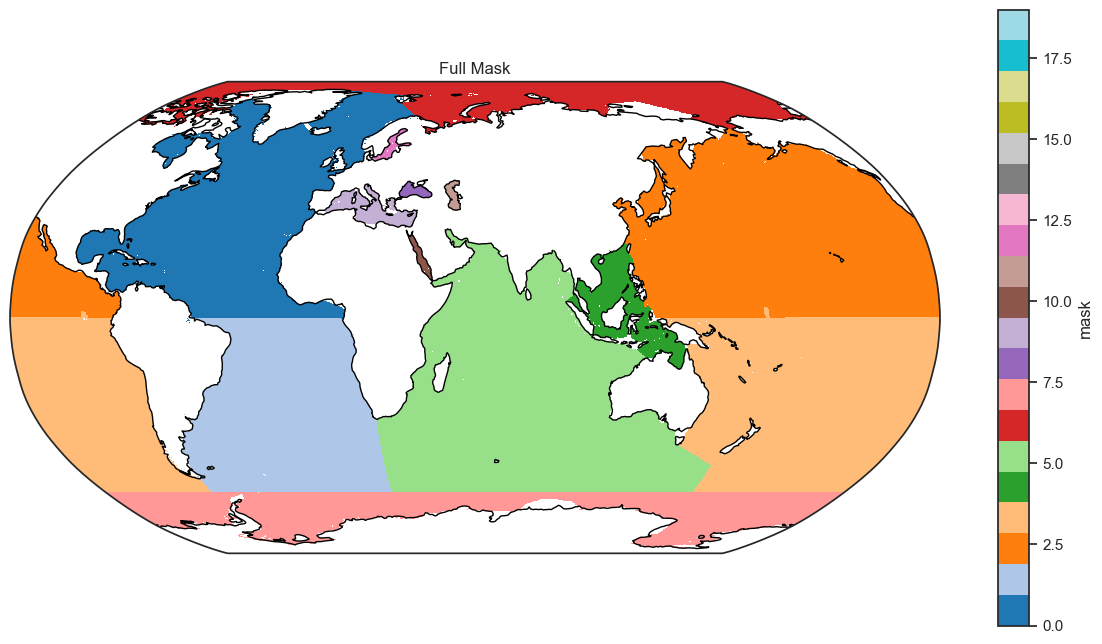

In [6]:
# load ocean basin data

basins = regionmask.defined_regions.natural_earth.ocean_basins_50

mask = merged_mask(basins, ds_deg, lon_name="longitude", lat_name="latitude")

kwargs = dict(x='longitude', y='latitude',transform = ccrs.PlateCarree(), infer_intervals=False)

fig, ax = plt.subplots(ncols=1, figsize=[15,8], subplot_kw={'projection':ccrs.Robinson(60)})

mask.plot(cmap='tab20', vmin=0, vmax=19, **kwargs)
ax.set_title(f"Full Mask")
ax.coastlines()

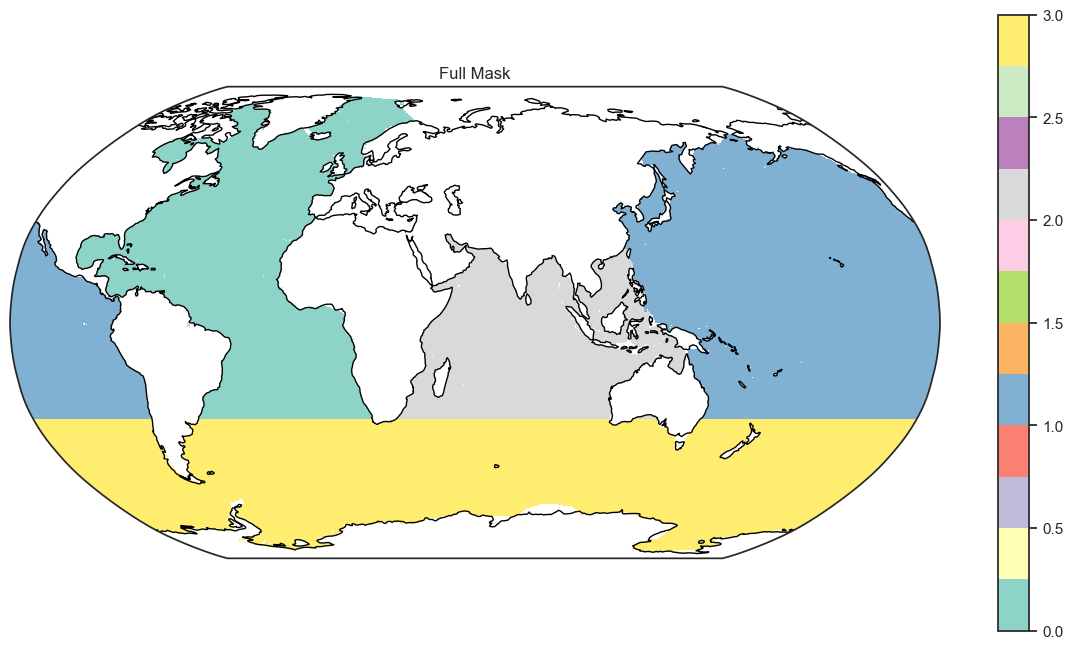

In [7]:
# Create combined mask for Atlantic, Pacific, Indian and Southern Ocean (30S - )

mask1 = mask.copy()

mask1 = mask1.where((mask1 <= -1) & (mask1 >= 20.))

mask1 = xr.where((mask==0) | (mask==1), 0., mask1) # Atlantic

mask1 = xr.where((mask==2) | (mask==3), 1., mask1) # Pacific

mask1 = xr.where((mask==4) | (mask==5), 2., mask1) # Indian

mask1 = xr.where((mask.latitude < -33.) & (mask >= -1) & (mask <= 20.), 3., mask1) # Southern Ocean

# In xr.where(condition, a, b), replace data with a where conditions are satisfied. Otherwise, replace data with b.
# On the other hand, mask.where(condition, b) replaces data with b where conditions are not satisfied satisfied and 
# keeps the original data in mask where conditions are satisfied.

kwargs = dict(x='longitude', y='latitude',transform = ccrs.PlateCarree(), infer_intervals=False)

fig, ax = plt.subplots(ncols=1, figsize=[15,8], subplot_kw={'projection':ccrs.Robinson(60)})

mask1.plot(cmap='Set3', **kwargs)
ax.set_title(f"Full Mask")
ax.coastlines()

In [8]:
# Actual model grid masking
# Mask from region_amsk does not agree with actual in model outptu

ds_mask = xr.open_dataset("../../Data/OM4p25_JRA55_Vorticity_Budget_Regrid_LatLon.nc")
ds_mask = ds_mask.drop(['x', 'y', 'lat', 'lon'])

mask_model = xr.where(np.isnan(ds_mask['BPT']) == False, 1., np.nan)

mask_model = mask_model.rename({'y':'latitude', 'x':'longitude'})
mask_model = mask_model.assign_coords({'latitude': ds_deg['latitude'], 'longitude': ds_deg['longitude']})

mask_model = xr.where((ds_deg['latitude'] > -80.), mask_model, np.nan)

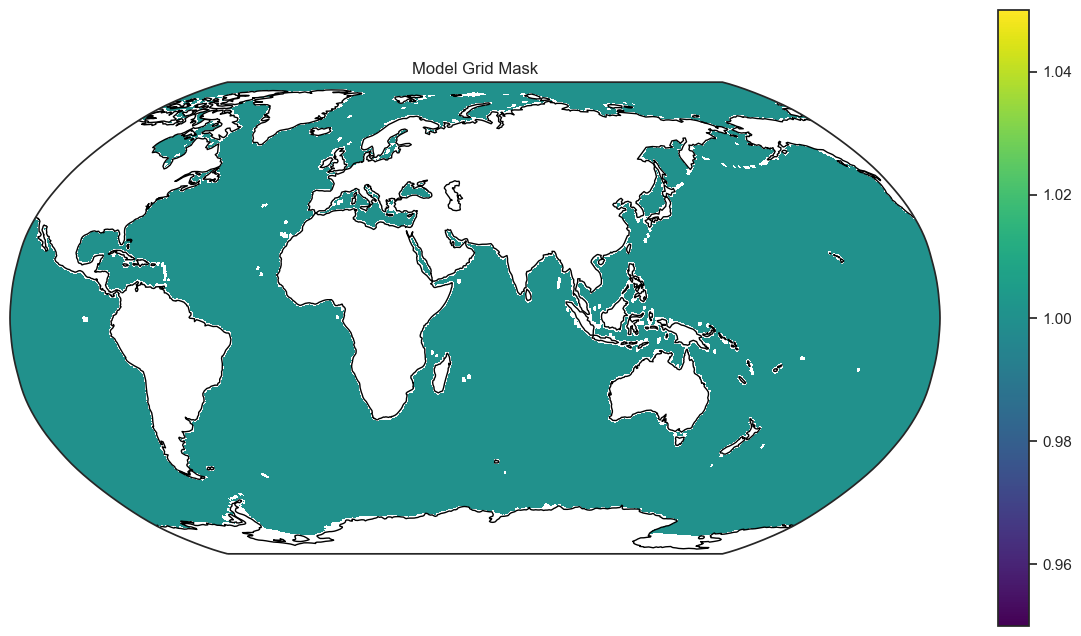

In [9]:
kwargs = dict(x='longitude', y='latitude',transform = ccrs.PlateCarree(), infer_intervals=False)
fig, ax = plt.subplots(ncols=1, figsize=[15,8], subplot_kw={'projection':ccrs.Robinson(60)})

mask_model.plot( **kwargs)
ax.set_title(f"Model Grid Mask")
ax.coastlines()

### Plot all terms in vortiicty budget 

It is to set the need for coarse-graining as the spatial structure is quite complicated and it is very diffcult to determine the dominant balance terms


1. Plot global map of vorticity budget terms.
2. PLot regional vorticity balances as a function of coarse-graining filter width.

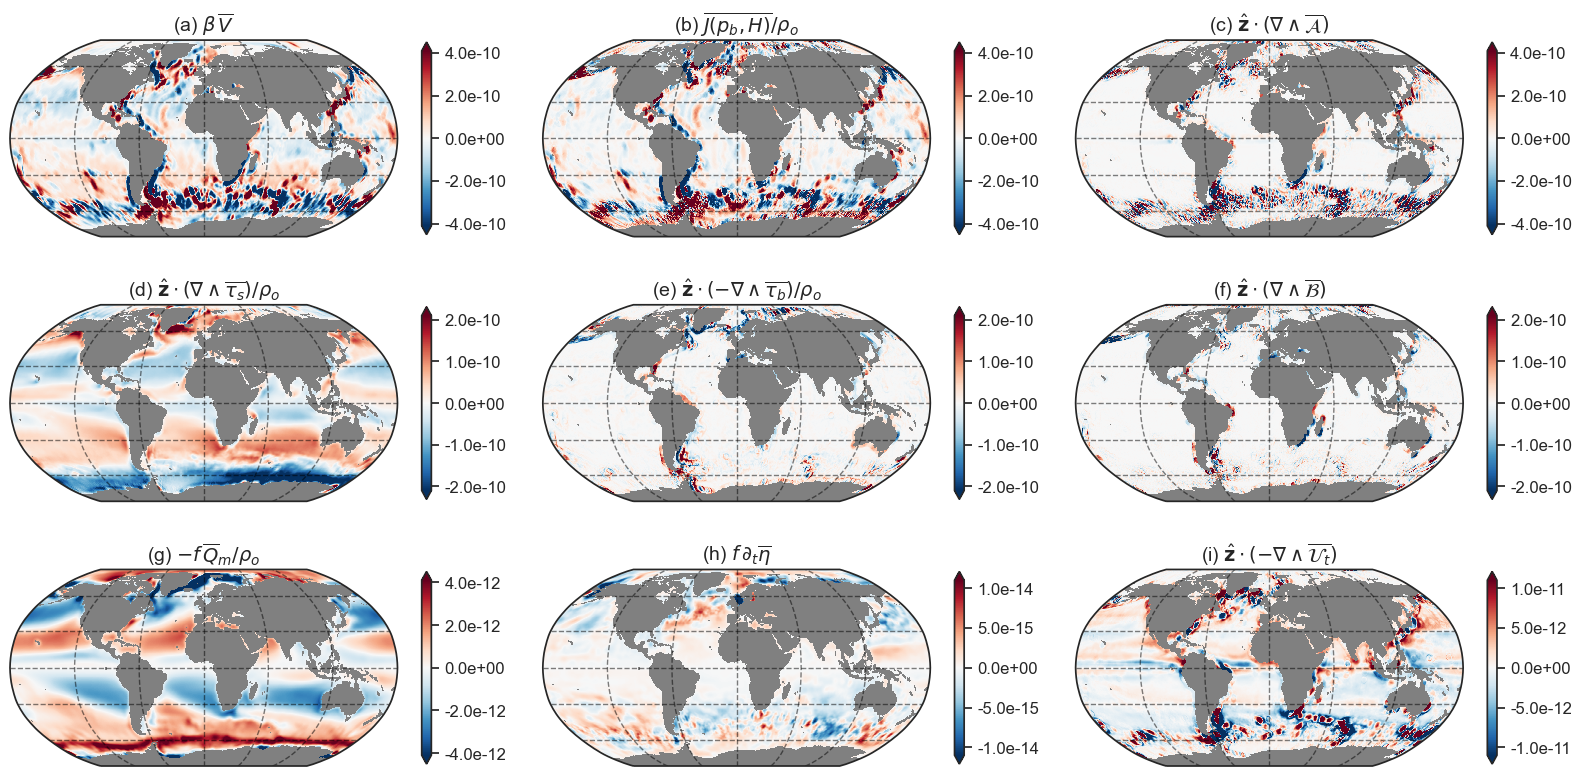

In [14]:
#Macros: {
#      bm: ["\\boldsymbol{#1}",1]
#    }


fldlist = ['beta_V', 'BPT','Curl_Adv', 'Curl_taus','Curl_taub','Curl_diff', 'Mass_flux', 'eta_dt', 'Curl_dudt']

max_r = [4.1e-10, 4.1e-10, 4.1e-10, 2.1e-10, 2.1e-10, 2.1e-10, 4.1e-12, 1.1e-14, 1.1e-11]

labels = [r'$\beta \, \overline{V}$', r'$\overline{J(p_b, H)}/\rho_o$', 
          r'$\hat{\mathbf{z}} \cdot (\nabla \wedge \overline{\mathcal{A}})$',
          r'$\hat{\mathbf{z}} \cdot (\nabla \wedge\overline{{\tau_s}})/\rho_o$', 
          r'$\hat{\mathbf{z}} \cdot (-\nabla \wedge\overline{{\tau_b}})/\rho_o$',
          r'$\hat{\mathbf{z}} \cdot (\nabla \wedge \overline{\mathcal{B}})$', 
          r'$-f \, \overline{Q}_m/{\rho_o}$', r'$f \, \partial_t\overline{\eta}$',
         r'$\hat{\mathbf{z}} \cdot (-\nabla \wedge \overline{\mathcal{U}_t})$']

ds = ds_deg.where(mask_model > 0.) #.where((mask >= -1) & (mask <= 20.))

grid1 = plt.GridSpec(3, 3, wspace=0.1, hspace=0.1)
fig = plt.figure(figsize=[20,10])

i = 0

for var in fldlist:
    
    ax = fig.add_subplot(grid1[int(i / 3), int(i % 3)], projection=ccrs.Robinson(), facecolor='grey')
    
    tmp = ds[var].isel(filter_scale = 4)
    _ = plot_globe(ax, tmp, vmin=-max_r[i], vmax=max_r[i], vstep=2.e-3*max_r[i], lon='longitude', 
                   lat='latitude', cmap='RdBu_r', title='(' + chr(97+i)+ ') ' + labels[i])
    
    i = i + 1 
    
#fig.savefig('../../Plots/Budget_Terms.pdf',dpi=150,bbox_inches='tight');
fig.savefig('../../Plots/Budget_Terms.png',dpi=300,bbox_inches='tight');

## North Atlantic Region

Analsysi in the North Atlantic (30-70 N) to compare against Corre et al. (2020) and Yeager (2015).

In [15]:
# Example for North Atlantic (30-70 N, Corre et al)

fldlist = ['beta_V', 'BPT','Curl_taus','Curl_taub','Curl_Adv','Curl_diff', 'Rest']
area = ds_km['cell_areas'].sel(latitude = slice(30., 70.), 
                               longitude = slice(-80., 0.)).isel(filter_scale=0).where(mask == 0.)

ds = ds_deg.sel(latitude = slice(30., 70.),
                longitude = slice(-80., 0.)).where(mask == 0.) 
ds_deg_std = xr.Dataset()

for fld in fldlist:
    
    if (fld == 'Rest'):
        tmp1 = ds['Mass_flux'] + ds['eta_dt'] + ds['Curl_dudt']
        tmp = (tmp1 * tmp1 * area/area).sum(['latitude', 'longitude']) / (area/area).sum(['latitude', 'longitude'])
    else:
        tmp = (ds[fld] * ds[fld] * area/area).sum(['latitude', 'longitude']) / (area/area).sum(['latitude', 'longitude'])
        
    ds_deg_std[fld] = np.sqrt(tmp) # standard deviation
    
ds = ds_km.sel(latitude = slice(30., 70.), longitude = slice(-80., 0.)).where(mask == 0.) 
ds_km_std = xr.Dataset()

for fld in fldlist:
    
    if (fld == 'Rest'):
        tmp1 = ds['Mass_flux'] + ds['eta_dt'] + ds['Curl_dudt']
        tmp = (tmp1 * tmp1 * area).sum(['latitude', 'longitude']) / area.sum(['latitude', 'longitude'])
    else:
        tmp = (ds[fld] * ds[fld] * area).sum(['latitude', 'longitude']) / area.sum(['latitude', 'longitude'])
        
    ds_km_std[fld] = np.sqrt(tmp)

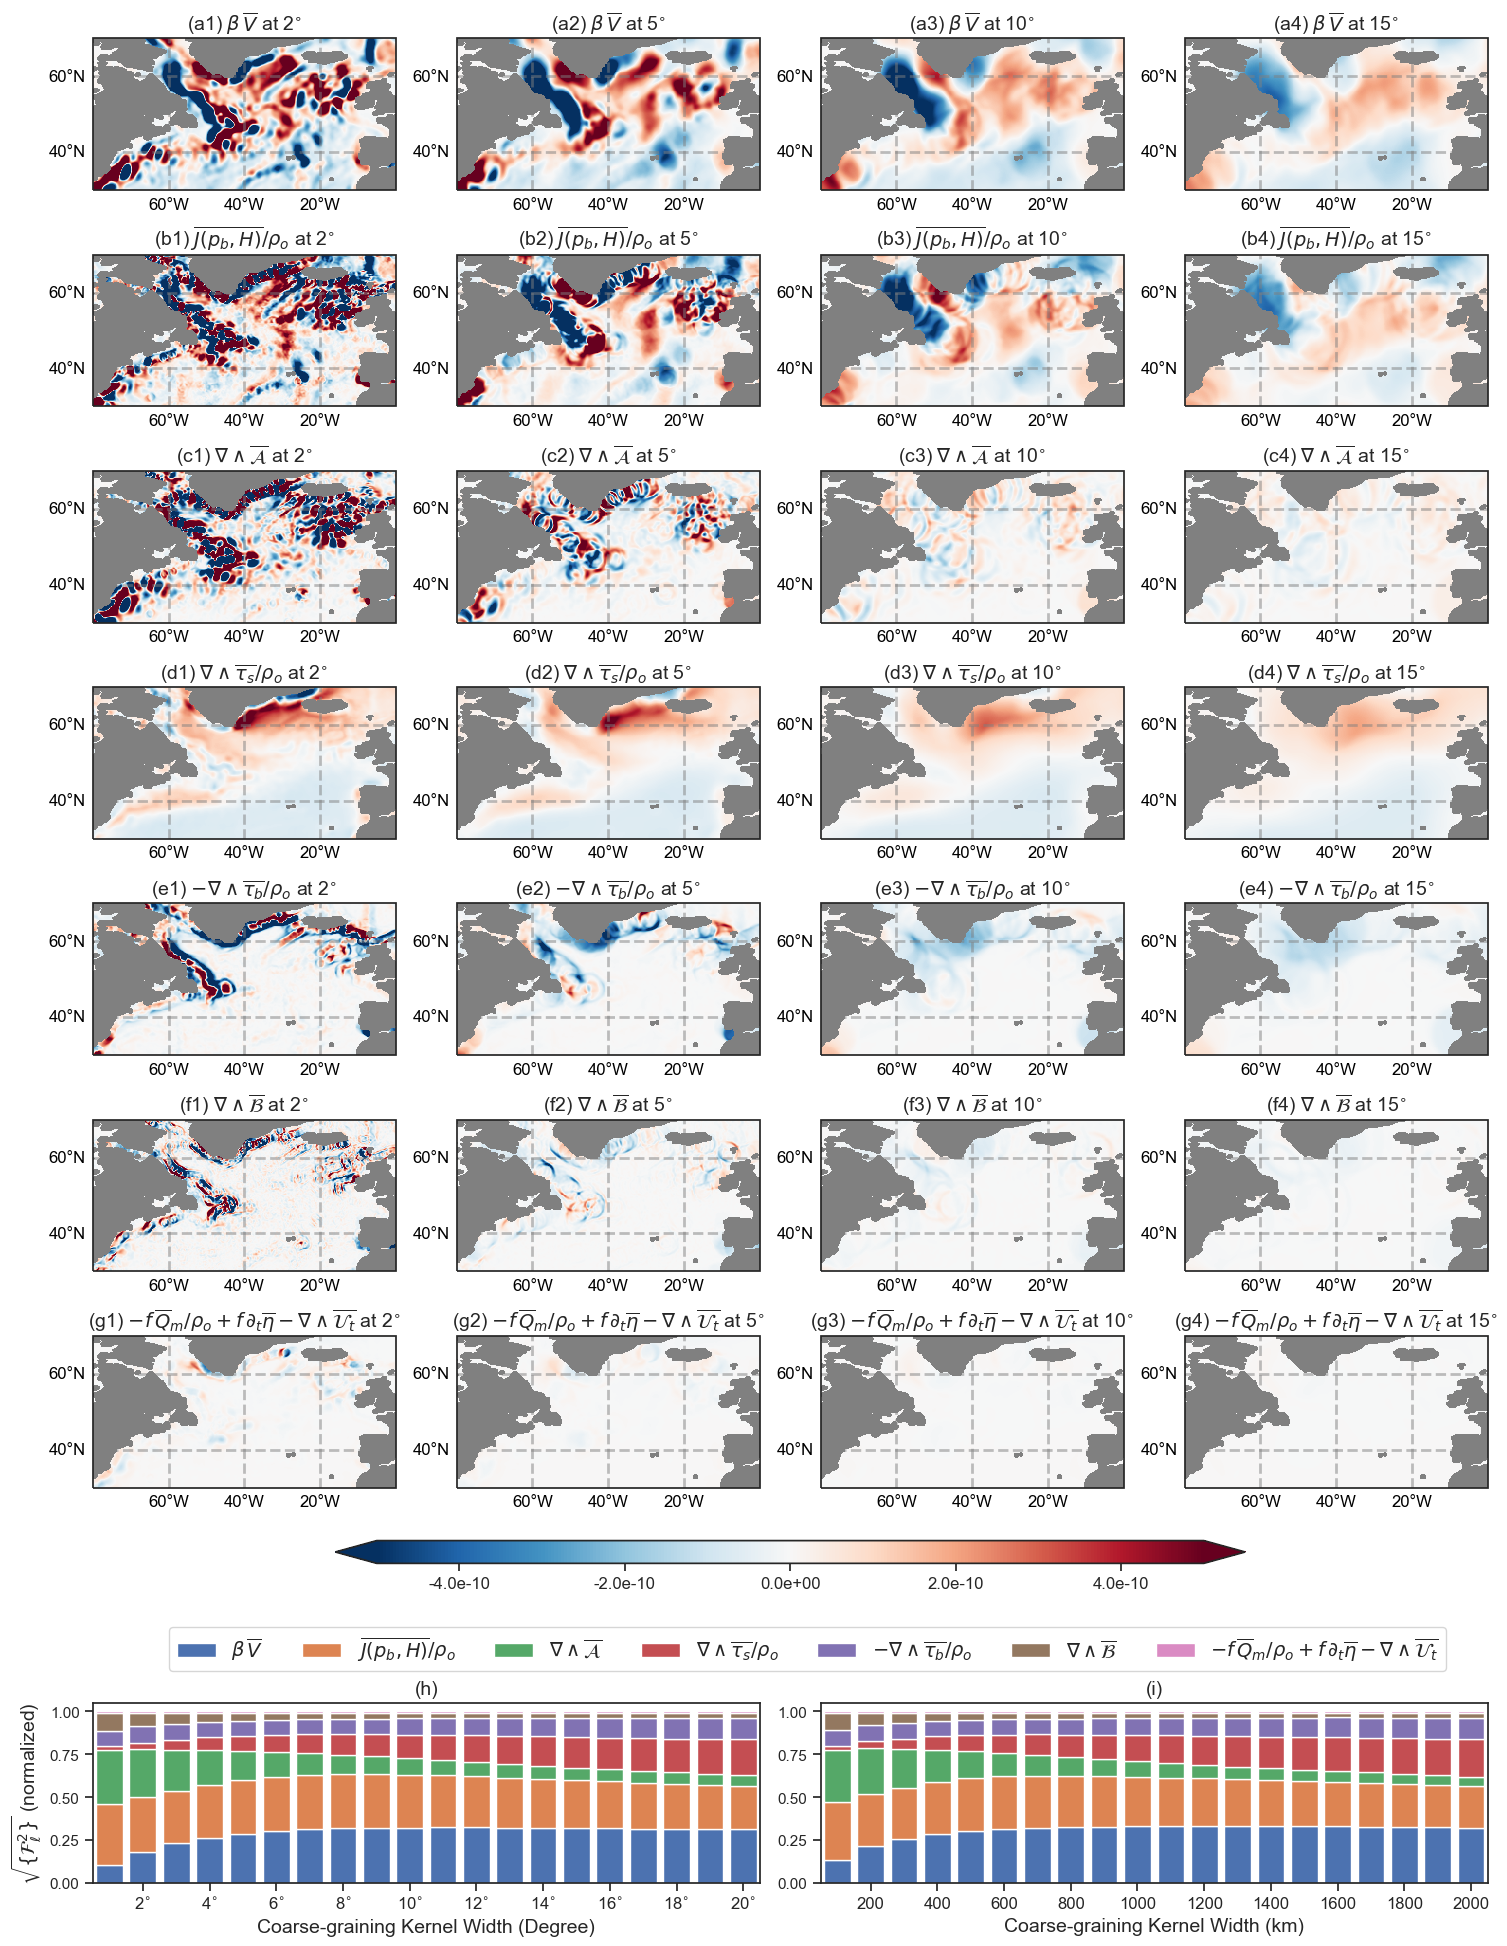

In [26]:
# Plot all terms for filtered in degree

ds = (ds_deg.sel(longitude=slice(-90., 0.), latitude = slice(10, 70))).where(mask_model==1.)
    #(mask >= -1) & (mask <= 20.))

lat_lon_ext = [-80., 0., 30., 70.]
max_r = 0.5e-9

grid1 = plt.GridSpec(8, 4, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[18,22])

ind = [1, 4, 9, 14] # 2, 5, 10 and 15 deg
j = 0

ax1 = [] 

for i in ind:
    
    ax = fig.add_subplot(grid1[0, j],projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['beta_V'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(97)+str(j+1) + ') ' + r'$\beta \, \overline{V}$ at ' + str(i+1)+'$^{\circ}$')
    if(j==0):
        plt.ylabel(r'$\beta \times V$', fontsize=14)
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[1, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['BPT'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(98)+str(j+1) + ') ' + r'$\overline{J(p_b, H)}/\rho_o$ at ' + str(i+1)+'$^{\circ}$')
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[2, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['Curl_Adv'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(99)+str(j+1) + ') ' 
                 + r'$\nabla \wedge \overline{\mathcal{A}}$ at ' + str(i+1)+'$^{\circ}$')
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[3, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['Curl_taus'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(100)+str(j+1) + ') ' 
                 + r'$\nabla \wedge\overline{{\tau_s}}/\rho_o$ at ' + str(i+1)+'$^{\circ}$')
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[4, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['Curl_taub'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(101)+str(j+1) + ') '  
                 + r'$-\nabla \wedge\overline{{\tau_b}}/\rho_o$ at ' + str(i+1)+'$^{\circ}$')
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[5, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['Curl_diff'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(102)+str(j+1) + ') ' 
                 + r'$\nabla \wedge \overline{\mathcal{B}}$ at ' + str(i+1)+'$^{\circ}$')
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[6, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, (ds['Mass_flux'] + ds['eta_dt'] + ds['Curl_dudt']).isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(103)+str(j+1) + ') ' +
                 r'$-f \, \overline{Q}_m/{\rho_o}+f \, \partial_t\overline{\eta}-\nabla \wedge \overline{\mathcal{U}_t}$ at '
                 + str(i+1)+'$^{\circ}$')
    
    ax1.append(ax)
    
    j = j + 1
    
# $-f \times Q_m / \rho_o + f \partial_t\eta - \nabla \wedge \mathcal{U}_t$
#cb = fig.colorbar(p, ax=ax1, extend='both', orientation="horizontal", shrink=0.3)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

axins = inset_axes(ax, width="100%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50% 
                   loc='lower left', bbox_to_anchor=(-2.8, -0.5, 3., 3.),
                   bbox_transform=ax.transAxes,
                   borderpad=0,)

cb = fig.colorbar(p, cax=axins, format='%.1e', extend='both', orientation="horizontal")
cb.ax.tick_params(labelsize=12)

width = 0.8 
d = ds_deg_std
scale = np.arange(d.filter_scale.shape[0]) + 1.0

ax = fig.add_subplot(grid1[7, 0:2])

bbox=plt.gca().get_position()
offset=.03
plt.gca().set_position([bbox.x0, bbox.y0 - 2.5*offset, bbox.x1-bbox.x0 - 0.*offset, bbox.y1 - bbox.y0 + 0.0*offset])
ax.set_xlim([0.5, 20.5])

bot = 0.
    
pos = - 0.0
width = 0.8

var_name = ['beta_V', 'BPT','Curl_Adv', 'Curl_taus', 'Curl_taub', 'Curl_diff', 'Rest']
norm_fac = d['beta_V'] + d['BPT'] + d['Curl_Adv'] + d['Curl_taus'] + d['Curl_taub'] + d['Curl_diff'] + d['Rest']

labels = [r'$\beta \, \overline{V}$', r'$\overline{J(p_b, H)}/\rho_o$', r'$\nabla \wedge \overline{\mathcal{A}}$',
          r'$\nabla \wedge\overline{{\tau_s}}/\rho_o$', r'$-\nabla \wedge\overline{{\tau_b}}/\rho_o$',
          r'$\nabla \wedge \overline{\mathcal{B}}$', 
         r'$-f \, \overline{Q}_m/{\rho_o}+f \, \partial_t\overline{\eta}-\nabla \wedge \overline{\mathcal{U}_t}$']

for var in var_name:
    
    tmp = d[var] / norm_fac
        
    plt.bar(scale + pos, tmp, width, bottom=bot)
        
    pos = pos + 0.*width
        
    bot = bot + tmp
    
ax.set_xlabel("Coarse-graining Kernel Width (Degree)", fontsize=14)   
ax.set_ylabel(r'$\sqrt{\{\mathcal{F}_\ell^2\}}$ (normalized)', fontsize=14)
ax.set_title("(h)", fontsize=14)
tick_Labels = [r'2$^{\circ}$', r'4$^{\circ}$', r'6$^{\circ}$', r'8$^{\circ}$', r'10$^{\circ}$',
         r'12$^{\circ}$', r'14$^{\circ}$', r'16$^{\circ}$', r'18$^{\circ}$', r'20$^{\circ}$']
plt.xticks(np.arange(2,21,2), tick_Labels, fontsize=12);
#ax.legend(labels, loc='center left', bbox_to_anchor=(1.0, 0.0), fontsize=14)

ax.legend(labels, loc='center left', ncol=7,  bbox_to_anchor=(0.1, 1.3), fontsize=14)

width = 0.8 
d = ds_km_std
scale = np.arange(d.filter_scale.shape[0]) + 1.0

ax = fig.add_subplot(grid1[7, 2:4])

bbox=plt.gca().get_position()
offset=.03
plt.gca().set_position([bbox.x0, bbox.y0 - 2.5*offset, bbox.x1-bbox.x0 - 0.*offset, bbox.y1 - bbox.y0 + 0.0*offset])
ax.set_xlim([0.5, 20.5])

bot = 0.
    
pos = - 0.0
width = 0.8

norm_fac = d['beta_V'] + d['BPT'] + d['Curl_Adv'] + d['Curl_taus'] + d['Curl_taub'] + d['Curl_diff'] + d['Rest']


for var in var_name:
    
    tmp = d[var] / norm_fac
        
    plt.bar(scale + pos, tmp, width, bottom=bot)
        
    pos = pos + 0.*width
        
    bot = bot + tmp
    
ax.set_xlabel("Coarse-graining Kernel Width (km)", fontsize=14)   
#ax.set_ylabel(r'$\sqrt{\{\mathcal{F}_\ell^2\}}$ (normalized)', fontsize=14)
ax.set_title("(i)", fontsize=14)
plt.xticks(np.arange(2,21,2), np.arange(200, 2100, 200), fontsize=12);

#fig.savefig('../../Plots/North_Atlantic_Budget.pdf',dpi=100,bbox_inches='tight');
fig.savefig('../../Plots/North_Atlantic_Budget.png',dpi=300,bbox_inches='tight');

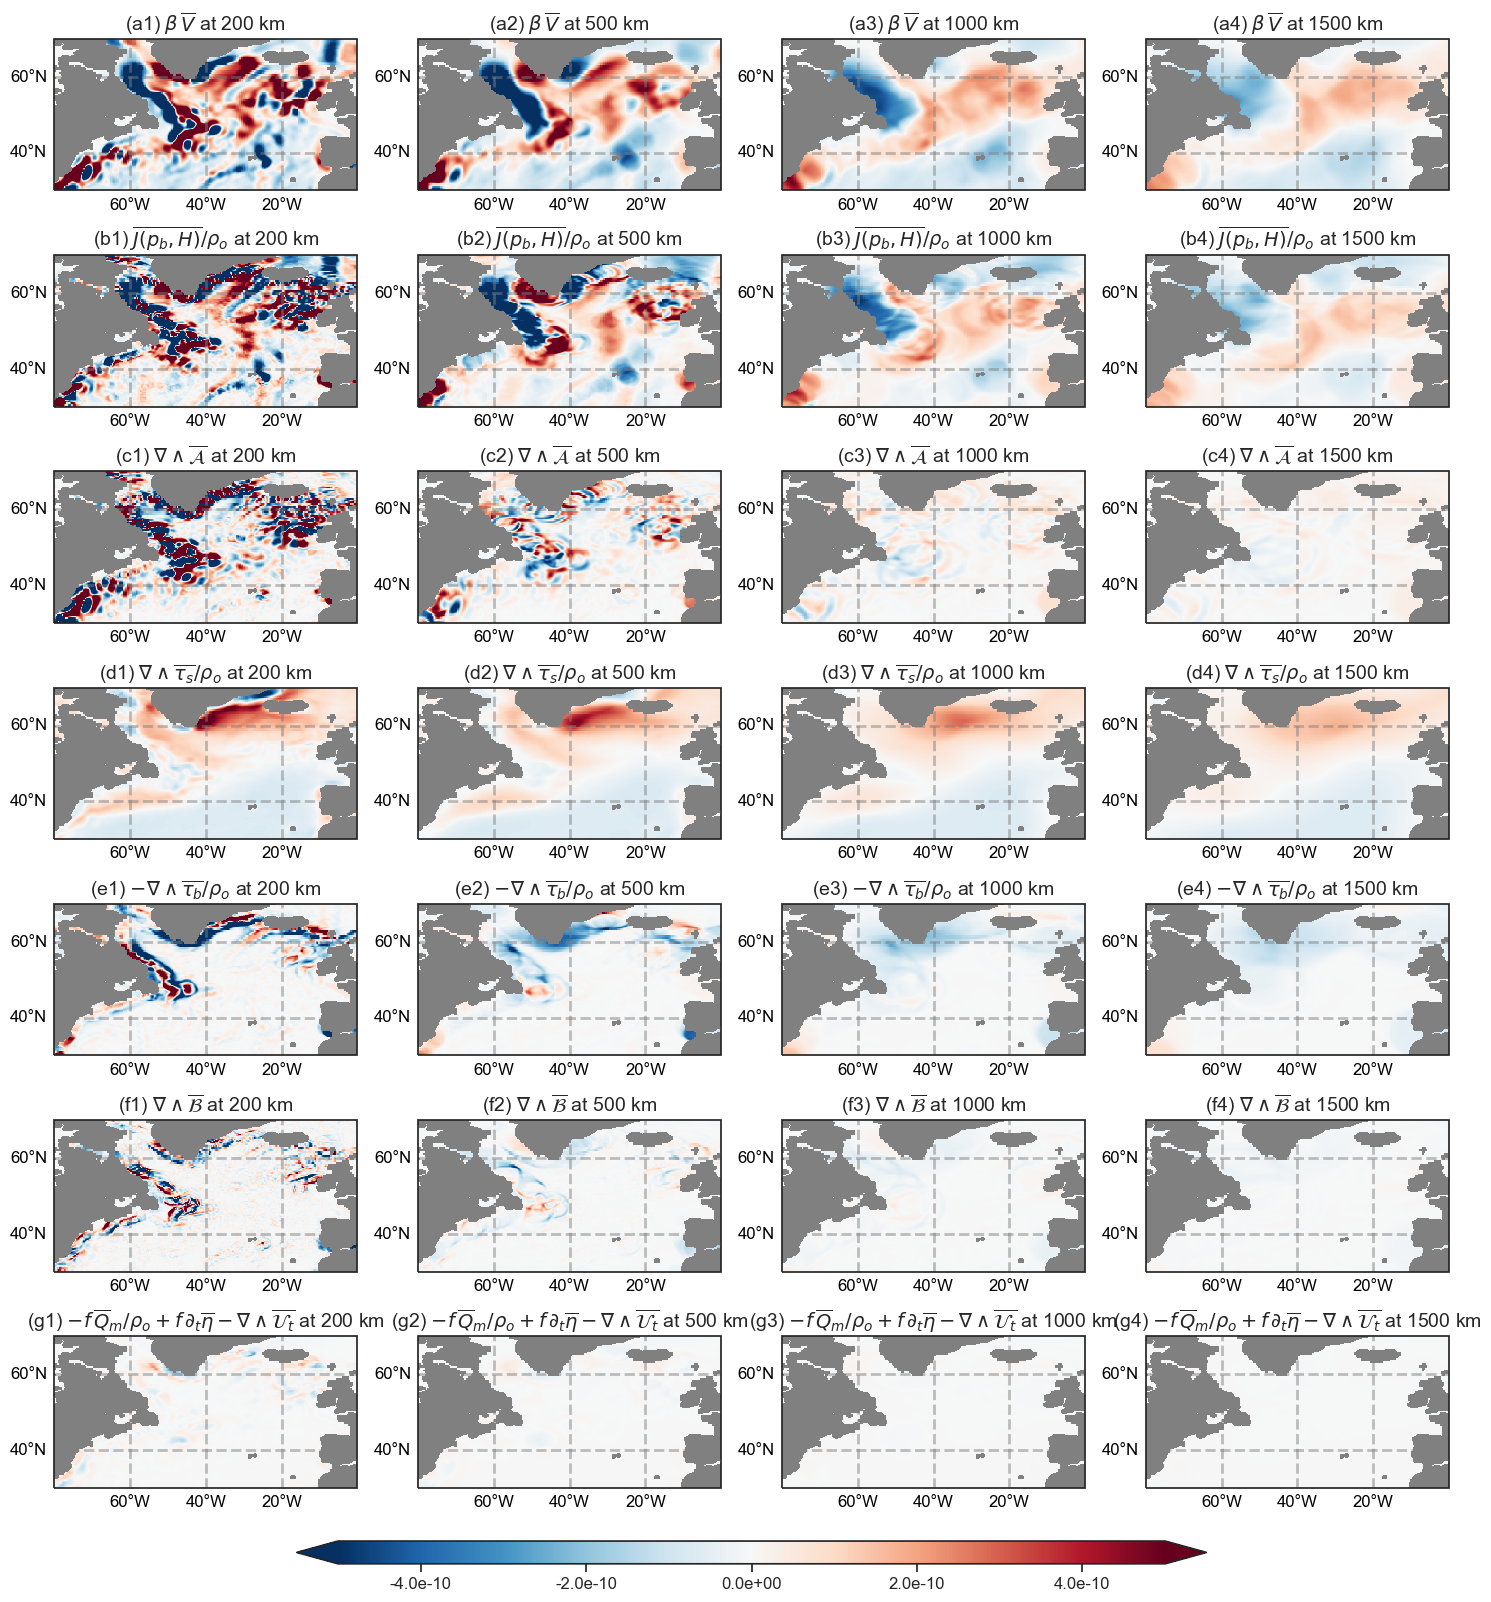

In [27]:
# Plot all terms for filtered in km

ds = (ds_km.sel(longitude=slice(-90., 0.), latitude = slice(10, 70))).where(mask_model ==1.)

lat_lon_ext = [-80., 0., 30., 70.]
max_r = 0.5e-9

grid1 = plt.GridSpec(8, 4, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[18,22])

ind = [1, 4, 9, 14] # 2, 5, 10 and 15 deg
j = 0

ax1 = [] 

for i in ind:
    
    ax = fig.add_subplot(grid1[0, j],projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['beta_V'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(97)+str(j+1) + ') ' + r'$\beta \, \overline{V}$ at ' + str((i+1)*100)+' km')
    if(j==0):
        plt.ylabel(r'$\beta \times V$', fontsize=14)
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[1, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['BPT'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(98)+str(j+1) + ') ' + r'$\overline{J(p_b, H)}/\rho_o$ at ' + str((i+1)*100)+' km')
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[2, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['Curl_Adv'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(99)+str(j+1) + ') ' + r'$\nabla \wedge \overline{\mathcal{A}}$ at ' + str((i+1)*100)+' km')
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[3, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['Curl_taus'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(100)+str(j+1) + ') ' + r'$\nabla \wedge\overline{{\tau_s}}/\rho_o$ at ' + str((i+1)*100)+' km')
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[4, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['Curl_taub'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(101)+str(j+1) + ') '  + r'$-\nabla \wedge\overline{{\tau_b}}/\rho_o$ at ' + str((i+1)*100)+' km')
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[5, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['Curl_diff'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(102)+str(j+1) + ') ' + r'$\nabla \wedge \overline{\mathcal{B}}$ at ' + str((i+1)*100)+' km')
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[6, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, (ds['Mass_flux'] + ds['eta_dt'] + ds['Curl_dudt']).isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(103)+str(j+1) + ') ' +
                 r'$-f \, \overline{Q}_m/{\rho_o}+f \, \partial_t\overline{\eta}-\nabla \wedge \overline{\mathcal{U}_t}$ at '
                 + str((i+1)*100)+' km')
    
    ax1.append(ax)
    
    j = j + 1
    
# $-f \times Q_m / \rho_o + f \partial_t\eta - \nabla \wedge \mathcal{U}_t$
#cb = fig.colorbar(p, ax=ax1, extend='both', orientation="horizontal", shrink=0.3)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

axins = inset_axes(ax, width="100%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50% 
                   loc='lower left', bbox_to_anchor=(-2.8, -0.5, 3., 3.),
                   bbox_transform=ax.transAxes,
                   borderpad=0,)

cb = fig.colorbar(p, cax=axins, format='%.1e', extend='both', orientation="horizontal")
cb.ax.tick_params(labelsize=12)

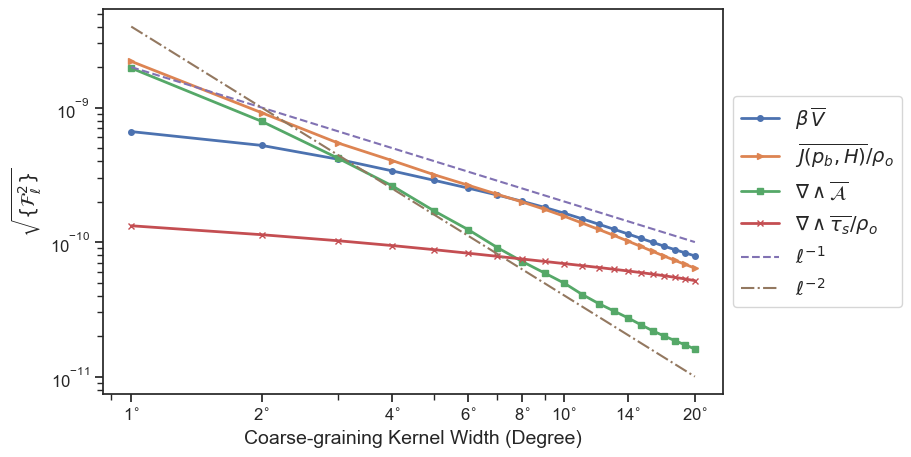

In [30]:
# scaling laws for vorticity budget terms

d = ds_deg_std
scale = np.arange(d.filter_scale.shape[0]) + 1.0

var_name = ['beta_V', 'BPT','Curl_Adv', 'Curl_taus'] #, 'Curl_taub', 'Curl_diff', 'Rest']
labels = [r'$\beta \, \overline{V}$', r'$\overline{J(p_b, H)}/\rho_o$', r'$\nabla \wedge \overline{\mathcal{A}}$',
          r'$\nabla \wedge\overline{{\tau_s}}/\rho_o$']

grid1 = plt.GridSpec(1, 1, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[8,5])

ax = fig.add_subplot(grid1[0, 0])
i=0
marke = ['o', '>', 's', 'x']
for var in var_name:
    plt.loglog(scale, d[var], ls ='-', lw=2, marker= marke[i], ms=4, label=labels[i])
    i=i+1

ax.loglog(scale, 2e-9/scale, '--', label=r'$\ell^{-1}$')
ax.loglog(scale, 4e-9/scale**2, '-.', label=r'$\ell^{-2}$')
ax.legend(loc='center left',  bbox_to_anchor=(1., 0.5), fontsize=14)
#ax.grid('on')
tick_Labels = [r'1$^{\circ}$', r'2$^{\circ}$', r'4$^{\circ}$', r'6$^{\circ}$', r'8$^{\circ}$', r'10$^{\circ}$',
               r'14$^{\circ}$', r'20$^{\circ}$']
plt.xticks([1,2,4,6,8,10,14,20], tick_Labels, fontsize=12);
plt.yticks(fontsize=12)
ax.set_xlabel("Coarse-graining Kernel Width (Degree)", fontsize=14);  
ax.set_ylabel(r'$\sqrt{\{\mathcal{F}_\ell^2\}}$', fontsize=14);

fig.savefig('../../Plots/BPT_NL_Scaling.pdf',dpi=300,bbox_inches='tight');

## Weddell Gyre Region

$85S - 40S$ and $70W - 0$

In [31]:
fldlist = ['beta_V', 'BPT','Curl_taus','Curl_taub','Curl_Adv','Curl_diff', 'Rest']
area = ds_km['cell_areas'].sel(latitude = slice(-85., -40.), longitude = slice(-70., 0.)).isel(filter_scale=0).where(mask1 == 3.)

ds = ds_deg.sel(latitude = slice(-85., -40.), longitude = slice(-70., 0.)).where(mask1 == 3.)
ds_deg_std = xr.Dataset()

for fld in fldlist:
    
    if (fld == 'Rest'):
        tmp1 = ds['Mass_flux'] + ds['eta_dt'] + ds['Curl_dudt']
        #tmp1 = ds['beta_V'] - ds['BPT'] - ds['Curl_taus'] - ds['Curl_taub'] - ds['Curl_Adv'] - ds['Curl_diff']
        tmp = (tmp1 * tmp1 * area/area).sum(['latitude', 'longitude']) / (area/area).sum(['latitude', 'longitude'])
    else:
        tmp = (ds[fld] * ds[fld] * area/area).sum(['latitude', 'longitude']) / (area/area).sum(['latitude', 'longitude'])
        
    ds_deg_std[fld] = np.sqrt(tmp) # standard deviation
    
ds = ds_km.sel(latitude = slice(-85., -40.), longitude = slice(-70., 0.)).where(mask1 == 3.)
ds_km_std = xr.Dataset()

for fld in fldlist:
    
    if (fld == 'Rest'):
        tmp1 = ds['Mass_flux'] + ds['eta_dt'] + ds['Curl_dudt']
        tmp = (tmp1 * tmp1 * area).sum(['latitude', 'longitude']) / area.sum(['latitude', 'longitude'])
    else:
        tmp = (ds[fld] * ds[fld] * area).sum(['latitude', 'longitude']) / area.sum(['latitude', 'longitude'])
        
    ds_km_std[fld] = np.sqrt(tmp)

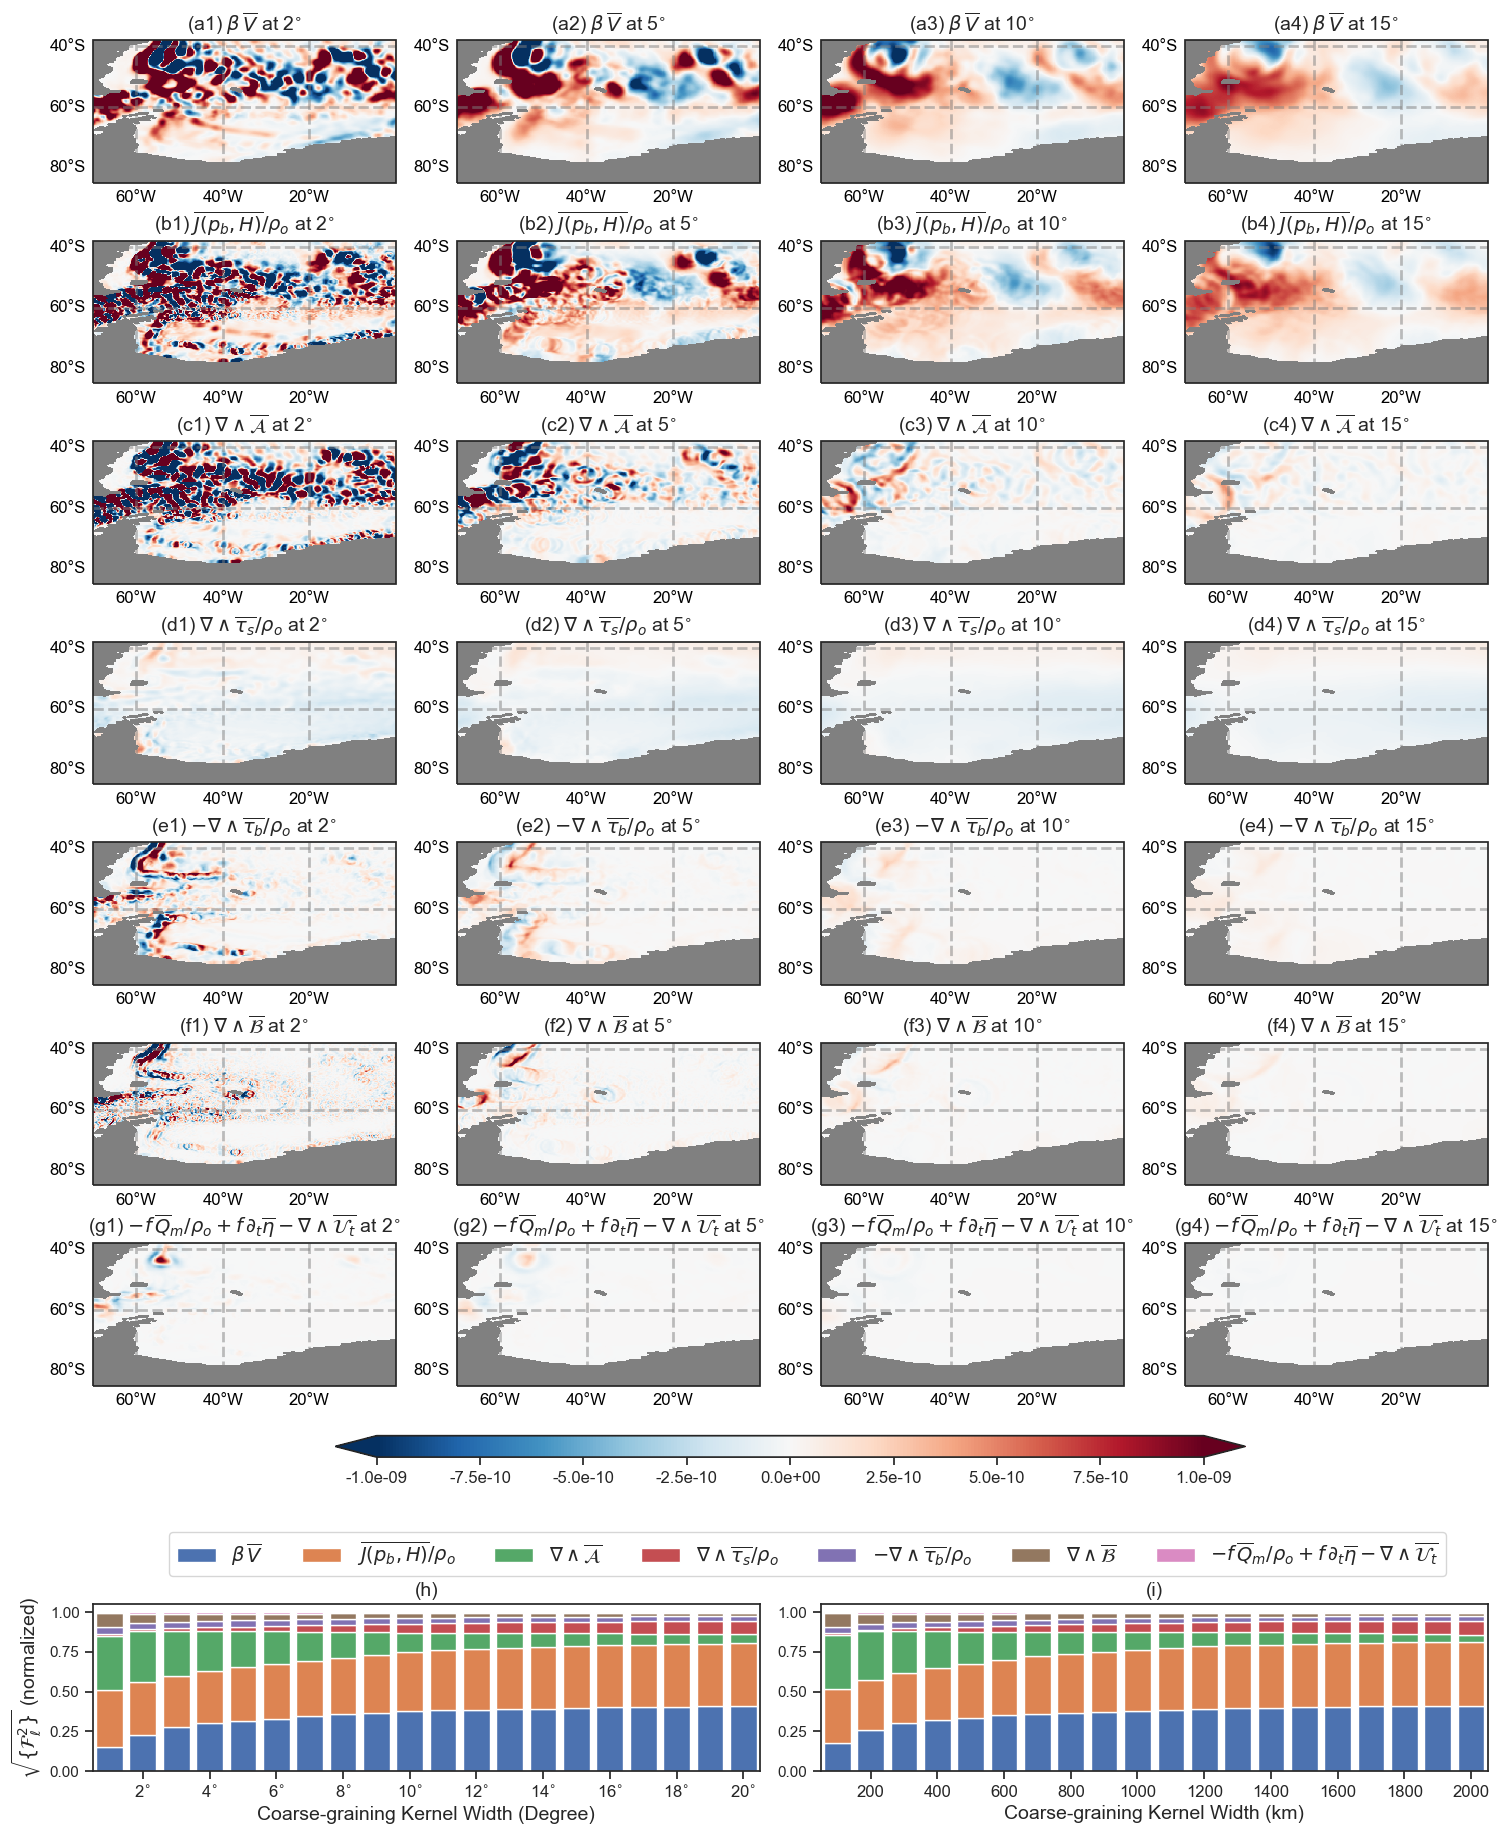

In [33]:
# Plot all terms for filtered in degree

ds = (ds_deg.sel(latitude = slice(-85., -38.), longitude = slice(-70., 0.))).where(mask_model == 1.)

lat_lon_ext = [-70., 0., -85., -38.]
max_r = 1.0e-9

grid1 = plt.GridSpec(9, 4, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[18,23])

ind = [1, 4, 9, 14] # 2, 5, 10 and 15 deg
j = 0

rt = 0.7

ax1 = [] 

for i in ind:
    
    ax = fig.add_subplot(grid1[0, j],projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['beta_V'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(97)+str(j+1) + ') ' + r'$\beta \, \overline{V}$ at ' + str(i+1)+'$^{\circ}$',
                aspect_rt = rt)
    if(j==0):
        plt.ylabel(r'$\beta \times V$', fontsize=14)
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[1, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['BPT'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(98)+str(j+1) + ') ' + r'$\overline{J(p_b, H)}/\rho_o$ at ' + str(i+1)+'$^{\circ}$',
                aspect_rt = rt)
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[2, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['Curl_Adv'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(99)+str(j+1) + ') ' + r'$\nabla \wedge \overline{\mathcal{A}}$ at ' + str(i+1)+'$^{\circ}$',
                aspect_rt = rt)
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[3, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['Curl_taus'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(100)+str(j+1) + ') ' + r'$\nabla \wedge\overline{{\tau_s}}/\rho_o$ at ' + str(i+1)+'$^{\circ}$',
                aspect_rt = rt)
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[4, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['Curl_taub'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(101)+str(j+1) + ') '  + r'$-\nabla \wedge\overline{{\tau_b}}/\rho_o$ at ' + str(i+1)+'$^{\circ}$',
                aspect_rt = rt)
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[5, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['Curl_diff'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(102)+str(j+1) + ') ' + r'$\nabla \wedge \overline{\mathcal{B}}$ at ' + str(i+1)+'$^{\circ}$',
                aspect_rt = rt)
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[6, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, (ds['Mass_flux'] + ds['eta_dt'] + ds['Curl_dudt']).isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(103)+str(j+1) + ') ' +
                 r'$-f \, \overline{Q}_m/{\rho_o}+f \, \partial_t\overline{\eta}-\nabla \wedge \overline{\mathcal{U}_t}$ at '
                 + str(i+1)+'$^{\circ}$', aspect_rt = rt)
    
    ax1.append(ax)
    
    j = j + 1
    
# $-f \times Q_m / \rho_o + f \partial_t\eta - \nabla \wedge \mathcal{U}_t$
#cb = fig.colorbar(p, ax=ax1, extend='both', orientation="horizontal", shrink=0.3)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

axins = inset_axes(ax, width="100%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50% 
                   loc='lower left', bbox_to_anchor=(-2.8, -0.5, 3., 3.),
                   bbox_transform=ax.transAxes,
                   borderpad=0,)

cb = fig.colorbar(p, cax=axins, format='%.1e', extend='both', orientation="horizontal")
cb.ax.tick_params(labelsize=12)

width = 0.8 
d = ds_deg_std
scale = np.arange(d.filter_scale.shape[0]) + 1.0

ax = fig.add_subplot(grid1[7, 0:2])

bbox=plt.gca().get_position()
offset=.03
plt.gca().set_position([bbox.x0, bbox.y0 - 2.5*offset, bbox.x1-bbox.x0 - 0.*offset, bbox.y1 - bbox.y0 + 0.0*offset])
ax.set_xlim([0.5, 20.5])

bot = 0.
    
pos = - 0.0
width = 0.8

var_name = ['beta_V', 'BPT','Curl_Adv', 'Curl_taus', 'Curl_taub', 'Curl_diff', 'Rest']
norm_fac = d['beta_V'] + d['BPT'] + d['Curl_Adv'] + d['Curl_taus'] + d['Curl_taub'] + d['Curl_diff'] + d['Rest']

labels = [r'$\beta \, \overline{V}$', r'$\overline{J(p_b, H)}/\rho_o$', r'$\nabla \wedge \overline{\mathcal{A}}$',
          r'$\nabla \wedge\overline{{\tau_s}}/\rho_o$', r'$-\nabla \wedge\overline{{\tau_b}}/\rho_o$',
          r'$\nabla \wedge \overline{\mathcal{B}}$', 
         r'$-f \, \overline{Q}_m/{\rho_o}+f \, \partial_t\overline{\eta}-\nabla \wedge \overline{\mathcal{U}_t}$']

for var in var_name:
    
    tmp = d[var] / norm_fac
        
    plt.bar(scale + pos, tmp, width, bottom=bot)
        
    pos = pos + 0.*width
        
    bot = bot + tmp
    
ax.set_xlabel("Coarse-graining Kernel Width (Degree)", fontsize=14)   
ax.set_ylabel(r'$\sqrt{\{\mathcal{F}_\ell^2\}}$ (normalized)', fontsize=14)
ax.set_title("(h)", fontsize=14)
tick_Labels = [r'2$^{\circ}$', r'4$^{\circ}$', r'6$^{\circ}$', r'8$^{\circ}$', r'10$^{\circ}$',
         r'12$^{\circ}$', r'14$^{\circ}$', r'16$^{\circ}$', r'18$^{\circ}$', r'20$^{\circ}$']
plt.xticks(np.arange(2,21,2), tick_Labels, fontsize=12);
#ax.legend(labels, loc='center left', bbox_to_anchor=(1.0, 0.0), fontsize=14)

ax.legend(labels, loc='center left', ncol=7,  bbox_to_anchor=(0.1, 1.3), fontsize=14)

width = 0.8 
d = ds_km_std
scale = np.arange(d.filter_scale.shape[0]) + 1.0

ax = fig.add_subplot(grid1[7, 2:4])

bbox=plt.gca().get_position()
offset=.03
plt.gca().set_position([bbox.x0, bbox.y0 - 2.5*offset, bbox.x1-bbox.x0 - 0.*offset, bbox.y1 - bbox.y0 + 0.0*offset])
ax.set_xlim([0.5, 20.5])

bot = 0.
    
pos = - 0.0
width = 0.8

norm_fac = d['beta_V'] + d['BPT'] + d['Curl_Adv'] + d['Curl_taus'] + d['Curl_taub'] + d['Curl_diff'] + d['Rest']

for var in var_name:
    
    tmp = d[var] / norm_fac
        
    plt.bar(scale + pos, tmp, width, bottom=bot)
        
    pos = pos + 0.*width
        
    bot = bot + tmp
    
ax.set_xlabel("Coarse-graining Kernel Width (km)", fontsize=14)   
#ax.set_ylabel(r'$\sqrt{|\mathcal{F}_\ell^2|}$ (normalized)', fontsize=14)
ax.set_title("(i)", fontsize=14)
plt.xticks(np.arange(2,21,2), np.arange(200, 2100, 200), fontsize=12);

#fig.savefig('../../Plots/Weddell_Budget.pdf',dpi=150,bbox_inches='tight');
fig.savefig('../../Plots/Weddell_Budget.png',dpi=300,bbox_inches='tight');

## Central Pacific

$20S - 20N$ and $180W - 100W$

In [34]:
fldlist = ['beta_V', 'BPT','Curl_taus','Curl_taub','Curl_Adv','Curl_diff', 'Rest']
area = ds_km['cell_areas'].sel(latitude = slice(-20., 20.), longitude = slice(-180., -100.)).isel(filter_scale=0).where(mask1 == 1.)

ds = ds_deg.sel(latitude = slice(-20., 20.), longitude = slice(-180., -100.)).where(mask1 == 1.)
ds_deg_std = xr.Dataset()

for fld in fldlist:
    
    if (fld == 'Rest'):
        tmp1 = ds['Mass_flux'] + ds['eta_dt'] + ds['Curl_dudt']
        #tmp1 = ds['beta_V'] - ds['BPT'] - ds['Curl_taus'] - ds['Curl_taub'] - ds['Curl_Adv'] - ds['Curl_diff']
        tmp = (tmp1 * tmp1 * area/area).sum(['latitude', 'longitude']) / (area/area).sum(['latitude', 'longitude'])
    else:
        tmp = (ds[fld] * ds[fld] * area/area).sum(['latitude', 'longitude']) / (area/area).sum(['latitude', 'longitude'])
        
    ds_deg_std[fld] = np.sqrt(tmp) # standard deviation
    
ds = ds_km.sel(latitude = slice(-20., 20.), longitude = slice(-180., -100.)).where(mask1 == 1.)
ds_km_std = xr.Dataset()

for fld in fldlist:
    
    if (fld == 'Rest'):
        tmp1 = ds['Mass_flux'] + ds['eta_dt'] + ds['Curl_dudt']
        tmp = (tmp1 * tmp1 * area).sum(['latitude', 'longitude']) / area.sum(['latitude', 'longitude'])
    else:
        tmp = (ds[fld] * ds[fld] * area).sum(['latitude', 'longitude']) / area.sum(['latitude', 'longitude'])
        
    ds_km_std[fld] = np.sqrt(tmp)

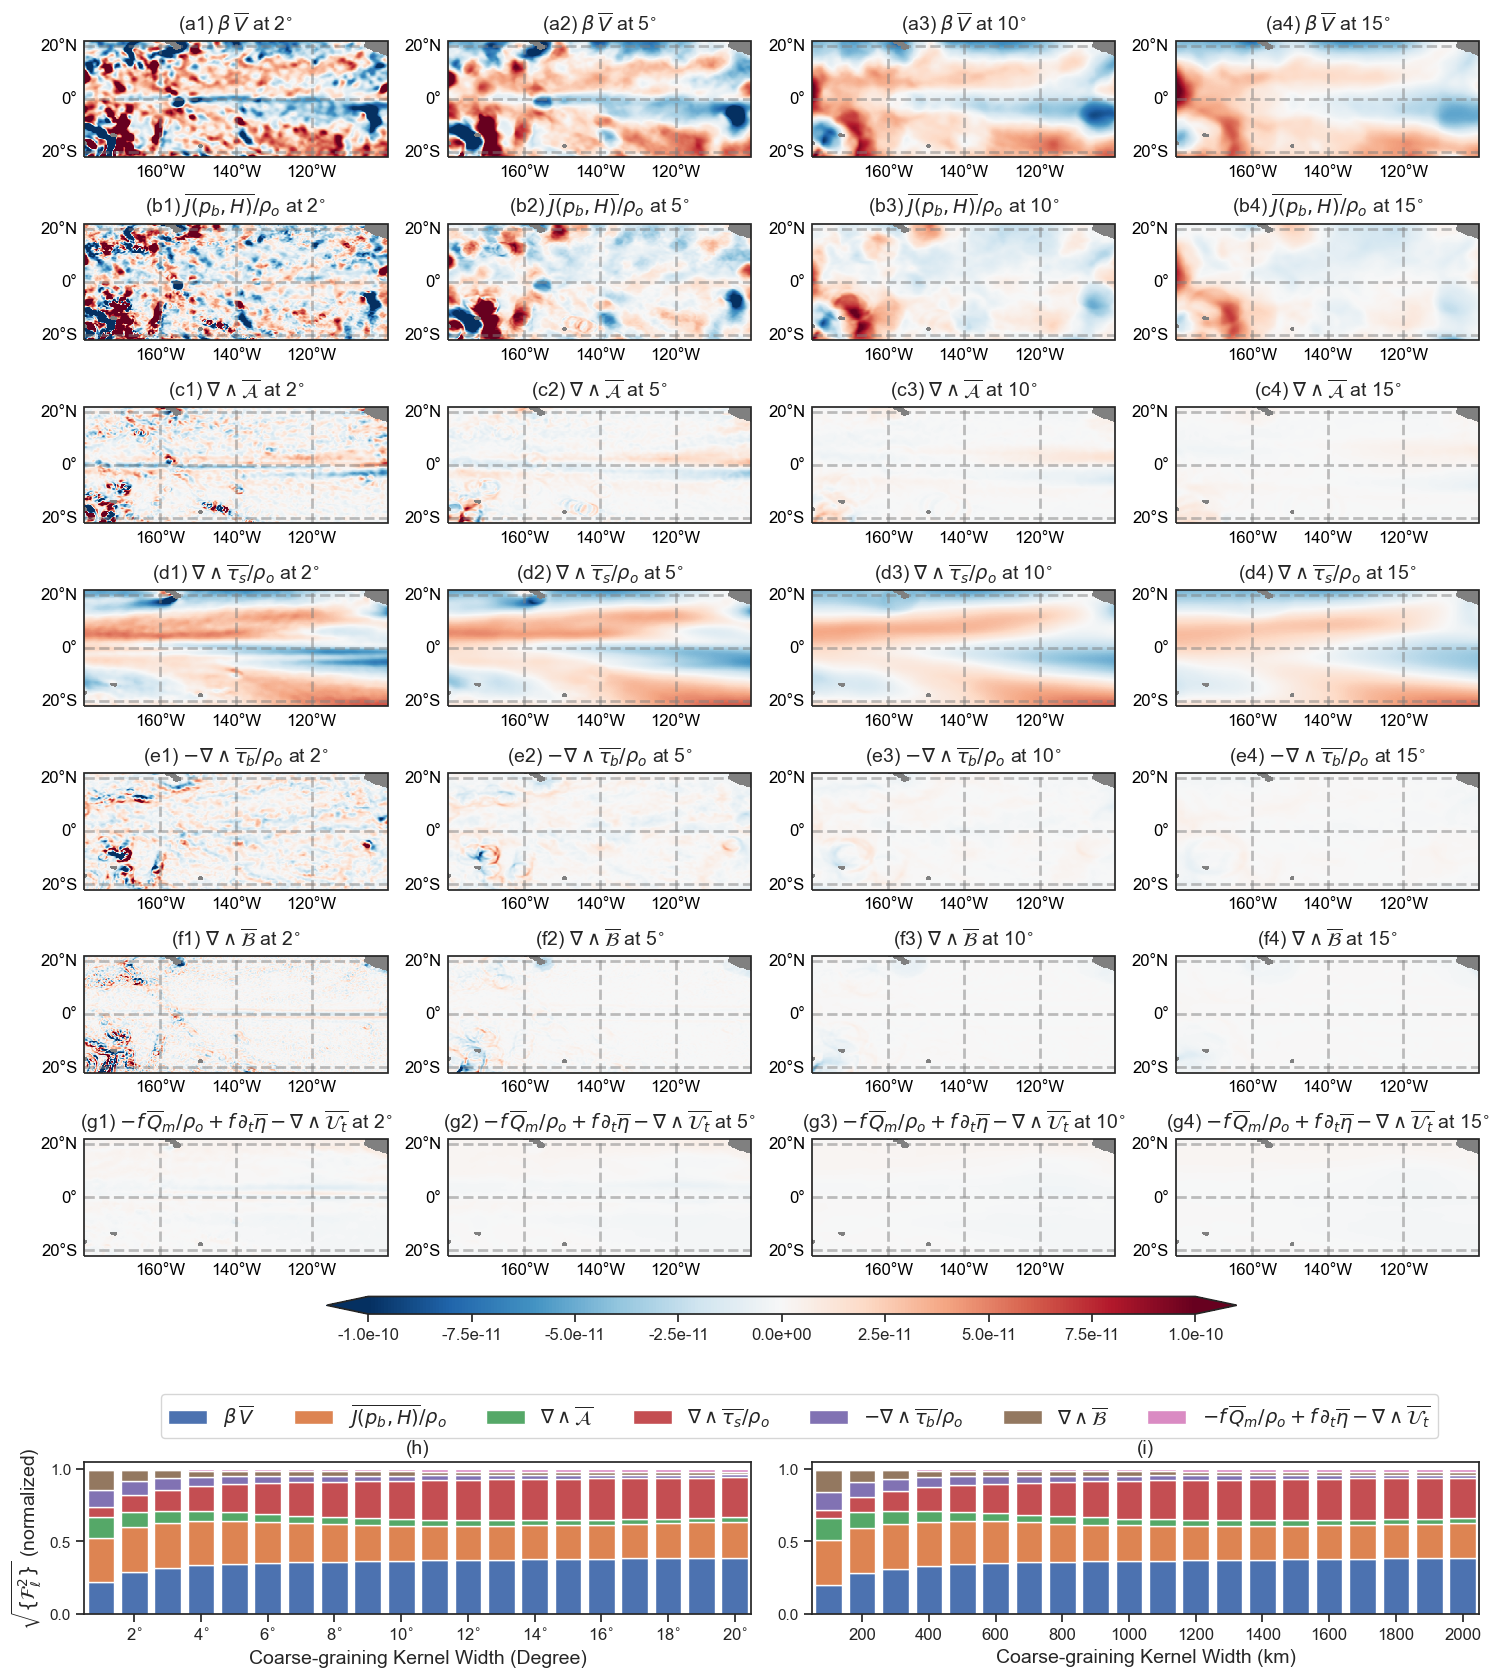

In [36]:
# Plot all terms for filtered in degree

ds = (ds_deg.sel(latitude = slice(-22., 22.), longitude = slice(-180., -100.))).where(mask_model == 1.)

lat_lon_ext = [-180., -100., -22., 22.]
max_r = 0.1e-9

grid1 = plt.GridSpec(9, 4, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[18,21])

ind = [1, 4, 9, 14] # 2, 5, 10 and 15 deg
j = 0

rt = 0.7

ax1 = [] 

for i in ind:
    
    ax = fig.add_subplot(grid1[0, j],projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['beta_V'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(97)+str(j+1) + ') ' + r'$\beta \, \overline{V}$ at ' + str(i+1)+'$^{\circ}$',
                aspect_rt = rt)
    if(j==0):
        plt.ylabel(r'$\beta \times V$', fontsize=14)
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[1, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['BPT'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(98)+str(j+1) + ') ' + r'$\overline{J(p_b, H)}/\rho_o$ at ' + str(i+1)+'$^{\circ}$',
                 aspect_rt = rt)
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[2, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['Curl_Adv'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(99)+str(j+1) + ') ' + r'$\nabla \wedge \overline{\mathcal{A}}$ at ' + str(i+1)+'$^{\circ}$',
                aspect_rt = rt)
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[3, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['Curl_taus'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(100)+str(j+1) + ') ' + r'$\nabla \wedge\overline{{\tau_s}}/\rho_o$ at ' + str(i+1)+'$^{\circ}$',
                aspect_rt = rt)
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[4, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['Curl_taub'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(101)+str(j+1) + ') '  + r'$-\nabla \wedge\overline{{\tau_b}}/\rho_o$ at ' + str(i+1)+'$^{\circ}$',
                aspect_rt = rt)
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[5, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, ds['Curl_diff'].isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(102)+str(j+1) + ') ' + r'$\nabla \wedge \overline{\mathcal{B}}$ at ' + str(i+1)+'$^{\circ}$',
                aspect_rt = rt)
    ax1.append(ax)
    
    ax = fig.add_subplot(grid1[6, j], projection=ccrs.PlateCarree(),facecolor='grey')
    p = plot_sec(ax, (ds['Mass_flux'] + ds['eta_dt'] + ds['Curl_dudt']).isel(filter_scale=i), vmin=-max_r, vmax=max_r, vstep=2.e-3*max_r, 
                 lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
                 title='(' + chr(103)+str(j+1) + ') ' +
                 r'$-f \, \overline{Q}_m/{\rho_o}+f \, \partial_t\overline{\eta}-\nabla \wedge \overline{\mathcal{U}_t}$ at '
                 + str(i+1)+'$^{\circ}$',aspect_rt = rt)
    
    ax1.append(ax)
    
    j = j + 1
    
# $-f \times Q_m / \rho_o + f \partial_t\eta - \nabla \wedge \mathcal{U}_t$
#cb = fig.colorbar(p, ax=ax1, extend='both', orientation="horizontal", shrink=0.3)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

axins = inset_axes(ax, width="100%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50% 
                   loc='lower left', bbox_to_anchor=(-2.8, -0.5, 3., 3.),
                   bbox_transform=ax.transAxes,
                   borderpad=0,)

cb = fig.colorbar(p, cax=axins, format='%.1e', extend='both', orientation="horizontal")
cb.ax.tick_params(labelsize=12)

width = 0.8 
d = ds_deg_std
scale = np.arange(d.filter_scale.shape[0]) + 1.0

ax = fig.add_subplot(grid1[7, 0:2])

bbox=plt.gca().get_position()
offset=.03
plt.gca().set_position([bbox.x0, bbox.y0 - 2.5*offset, bbox.x1-bbox.x0 - 0.*offset, bbox.y1 - bbox.y0 + 0.0*offset])
ax.set_xlim([0.5, 20.5])

bot = 0.
    
pos = - 0.0
width = 0.8

var_name = ['beta_V', 'BPT','Curl_Adv', 'Curl_taus', 'Curl_taub', 'Curl_diff', 'Rest']
norm_fac = d['beta_V'] + d['BPT'] + d['Curl_Adv'] + d['Curl_taus'] + d['Curl_taub'] + d['Curl_diff'] + d['Rest']

labels = [r'$\beta \, \overline{V}$', r'$\overline{J(p_b, H)}/\rho_o$', r'$\nabla \wedge \overline{\mathcal{A}}$',
          r'$\nabla \wedge\overline{{\tau_s}}/\rho_o$', r'$-\nabla \wedge\overline{{\tau_b}}/\rho_o$',
          r'$\nabla \wedge \overline{\mathcal{B}}$',
         r'$-f \, \overline{Q}_m/{\rho_o}+f \, \partial_t\overline{\eta}-\nabla \wedge \overline{\mathcal{U}_t}$']

for var in var_name:
    
    tmp = d[var] / norm_fac
        
    plt.bar(scale + pos, tmp, width, bottom=bot)
        
    pos = pos + 0.*width
        
    bot = bot + tmp
    
ax.set_xlabel("Coarse-graining Kernel Width (Degree)", fontsize=14)   
ax.set_ylabel(r'$\sqrt{\{\mathcal{F}_\ell^2\}}$ (normalized)', fontsize=14)
ax.set_title("(h)", fontsize=14)
tick_Labels = [r'2$^{\circ}$', r'4$^{\circ}$', r'6$^{\circ}$', r'8$^{\circ}$', r'10$^{\circ}$',
         r'12$^{\circ}$', r'14$^{\circ}$', r'16$^{\circ}$', r'18$^{\circ}$', r'20$^{\circ}$']
plt.xticks(np.arange(2,21,2), tick_Labels, fontsize=12);
#ax.legend(labels, loc='center left', bbox_to_anchor=(1.0, 0.0), fontsize=14)

ax.legend(labels, loc='center left', ncol=7,  bbox_to_anchor=(0.1, 1.3), fontsize=14)

width = 0.8 
d = ds_km_std
scale = np.arange(d.filter_scale.shape[0]) + 1.0

ax = fig.add_subplot(grid1[7, 2:4])

bbox=plt.gca().get_position()
offset=.03
plt.gca().set_position([bbox.x0, bbox.y0 - 2.5*offset, bbox.x1-bbox.x0 - 0.*offset, bbox.y1 - bbox.y0 + 0.0*offset])
ax.set_xlim([0.5, 20.5])

bot = 0.
    
pos = - 0.0
width = 0.8

norm_fac = d['beta_V'] + d['BPT'] + d['Curl_Adv'] + d['Curl_taus'] + d['Curl_taub'] + d['Curl_diff'] + d['Rest']

for var in var_name:
    
    tmp = d[var] / norm_fac
        
    plt.bar(scale + pos, tmp, width, bottom=bot)
        
    pos = pos + 0.*width
        
    bot = bot + tmp
    
ax.set_xlabel("Coarse-graining Kernel Width (km)", fontsize=14)   
#ax.set_ylabel(r'$\sqrt{|\mathcal{F}_\ell^2|}$ (normalized)', fontsize=14)
ax.set_title("(i)", fontsize=14)
plt.xticks(np.arange(2,21,2), np.arange(200, 2100, 200), fontsize=12);

#fig.savefig('../../Plots/Central_Pacific_Budget.pdf',dpi=150,bbox_inches='tight');
fig.savefig('../../Plots/Central_Pacific_Budget.png',dpi=300,bbox_inches='tight');

## Global barplot

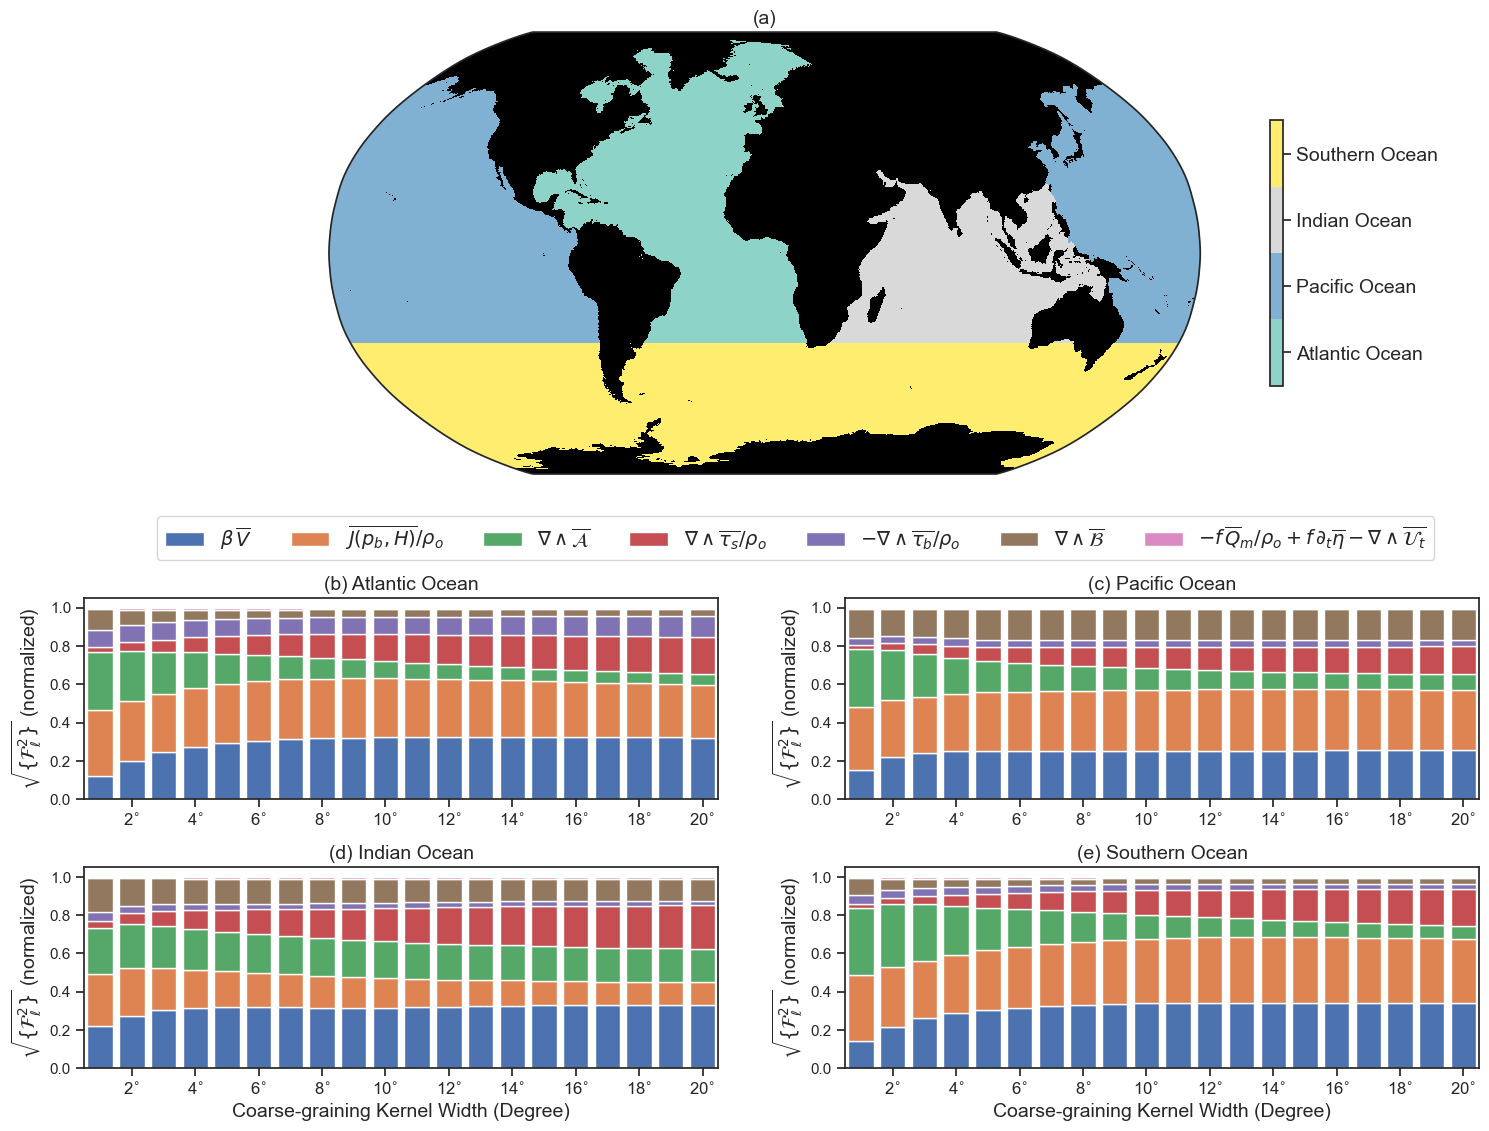

In [38]:
grid1 = plt.GridSpec(4, 2, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[18,12])

col = plt.cm.get_cmap('Set3', 4)

# mask plot
ax = fig.add_subplot(grid1[0:2, 0:2], projection=ccrs.Robinson(), facecolor='black')
kwargs = dict(x='longitude', y='latitude',transform = ccrs.PlateCarree(), infer_intervals=False, add_colorbar=False)
p = mask1.plot(cmap=col, vmin=-0.5, vmax = 3.5, **kwargs) #, cbar_kwargs=dict(shrink=0.8, ticks=[0., 1., 2. , 3.]))
cb = plt.colorbar(p, ax=ax, shrink=0.6)
cb.ax.tick_params(labelsize=12)
cb.ax.set_yticklabels([' ', 'Atlantic Ocean', 'Pacific Ocean', 
                        'Indian Ocean','Southern Ocean'], fontsize=14)
#ax.set_title(f"Full Mask")
#ax.coastlines()
ax.set_title('(a)', fontsize=14)

# loop for computing domain-avg values and barplot

fldlist = ['beta_V', 'BPT','Curl_taus','Curl_taub','Curl_Adv','Curl_diff', 'Rest']

var_name = ['beta_V', 'BPT','Curl_Adv', 'Curl_taus', 'Curl_taub', 'Curl_diff', 'Rest']

label_title = ['(b) Atlantic Ocean', '(c) Pacific Ocean', '(d) Indian Ocean', '(e) Southern Ocean']

for i in range(0,4):
    
    if (i > 1):
        j = 1;
    else:
        j = 0;
    
    
    area = ds_km['cell_areas'].isel(filter_scale=0).where(mask1 == i)

    ds = ds_deg.where(mask1 == i)
    ds_deg_std = xr.Dataset()

    for fld in fldlist:

        if (fld == 'Rest'):
            tmp1 = ds['Mass_flux'] + ds['eta_dt'] + ds['Curl_dudt']
            tmp = (tmp1 * tmp1 * area/area).sum(['latitude', 'longitude']) / (area/area).sum(['latitude', 'longitude'])
        else:
            tmp = (ds[fld] * ds[fld] * area/area).sum(['latitude', 'longitude']) / (area/area).sum(['latitude', 'longitude'])

        ds_deg_std[fld] = np.sqrt(tmp) # standard deviation
        
    
    # plot
    width = 0.8 
    d = ds_deg_std
    scale = np.arange(d.filter_scale.shape[0]) + 1.0

    ax = fig.add_subplot(grid1[2 + j, i - 2*j])

    bbox=plt.gca().get_position()
    offset=.07
    plt.gca().set_position([bbox.x0, bbox.y0 - (j/3. + 1.)*offset, bbox.x1-bbox.x0 - 0.*offset, bbox.y1 - bbox.y0 + 0.0*offset])
    ax.set_xlim([0.5, 20.5])

    bot = 0.

    pos = - 0.0
    width = 0.8

    norm_fac = d['beta_V'] + d['BPT'] + d['Curl_Adv'] + d['Curl_taus'] + d['Curl_taub'] + d['Curl_diff'] + d['Rest']

    labels = [r'$\beta \, \overline{V}$', r'$\overline{J(p_b, H)}/\rho_o$', r'$\nabla \wedge \overline{\mathcal{A}}$',
              r'$\nabla \wedge\overline{{\tau_s}}/\rho_o$', r'$-\nabla \wedge\overline{{\tau_b}}/\rho_o$',
              r'$\nabla \wedge \overline{\mathcal{B}}$',
             r'$-f \, \overline{Q}_m/{\rho_o}+f \, \partial_t\overline{\eta}-\nabla \wedge \overline{\mathcal{U}_t}$']

    for var in var_name:

        tmp = d[var] / norm_fac

        plt.bar(scale + pos, tmp, width, bottom=bot)

        pos = pos + 0.*width

        bot = bot + tmp

    if(i>1):
        ax.set_xlabel("Coarse-graining Kernel Width (Degree)", fontsize=14)   
    ax.set_ylabel(r'$\sqrt{\{\mathcal{F}_\ell^2\}}$ (normalized)', fontsize=14)
    tick_Labels = [r'2$^{\circ}$', r'4$^{\circ}$', r'6$^{\circ}$', r'8$^{\circ}$', r'10$^{\circ}$',
             r'12$^{\circ}$', r'14$^{\circ}$', r'16$^{\circ}$', r'18$^{\circ}$', r'20$^{\circ}$']
    plt.xticks(np.arange(2,21,2), tick_Labels, fontsize=12);
    ax.set_title(label_title[i], fontsize=14)
    if (i==0):
        ax.legend(labels, loc='center left', ncol=7,  bbox_to_anchor=(0.1, 1.3), fontsize=14)
        
#fig.savefig('../../Plots/Global_Budget.pdf',dpi=150,bbox_inches='tight');
fig.savefig('../../Plots/Global_Budget.png',dpi=300,bbox_inches='tight');

### Spatial map showing main balances

Here, we plot the spatial maps for main voritciy balanaces (color-coded) at 2, 5, 10 and 20 degree resolutions.

Kernel Grid size in degree =  2
Total grid points =  591663.0
V_BPT_A grid points % =  0.18150366002268176
V_taus_BPT grid points % =  0.19983673138256064
V_taus grid points % =  0.04997946466147114
V_taub_B grid points % =  0.0011898665287503184
Other grid points % =  0.567490277404536
 
Kernel Grid size in degree =  5
Total grid points =  591663.0
V_BPT_A grid points % =  0.14610006033840203
V_taus_BPT grid points % =  0.3180780275258043
V_taus grid points % =  0.1448544188161167
V_taub_B grid points % =  0.0006422575013140929
Other grid points % =  0.3903252358183629
 
Kernel Grid size in degree =  10
Total grid points =  591663.0
V_BPT_A grid points % =  0.11020462662022129
V_taus_BPT grid points % =  0.37073807217960214
V_taus grid points % =  0.20455225356326154
V_taub_B grid points % =  0.0004343688890466364
Other grid points % =  0.3140706787478683
 
Kernel Grid size in degree =  20
Total grid points =  591663.0
V_BPT_A grid points % =  0.06796605500090425
V_taus_BPT grid point

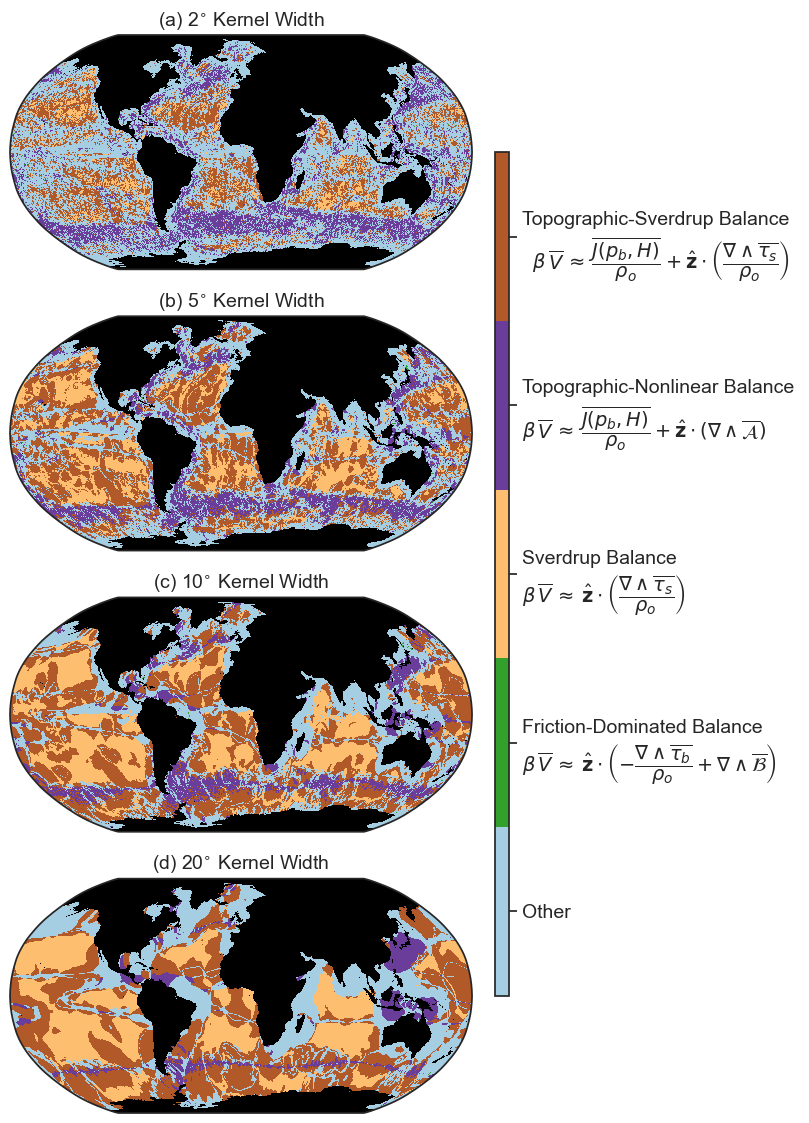

In [41]:
i_ind = [1, 4, 9, 19]

fldlist = ['beta_V', 'BPT','Curl_taus','Curl_taub','Curl_Adv','Curl_diff', 'Rest']

cut_off = 0.8

col = plt.cm.get_cmap('Paired', 5)

#palette = sns.color_palette("tab10", 10)
#palette = sns.color_palette([palette[0], palette[1], palette[3], palette[4], palette[5]], as_cmap=True)
#col = palette

grid1 = plt.GridSpec(4, 1, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[14,14])

for i in range(0, len(i_ind)):
    
    print("Kernel Grid size in degree = ", i_ind[i] +1)

    ds = np.abs(ds_deg.isel(filter_scale = i_ind[i])).where(mask1 < 10.)
    
    total_grid = ((mask1+0.1)/(mask1+0.1)).sum().values
    print("Total grid points = ", ((mask1+0.1)/(mask1+0.1)).sum().values)

    # ---- Compute normalizing factor ----------
    norm_fac = ds['beta_V'] * 0.

    for fld in fldlist:

        if (fld == 'Rest'):
            norm_fac = norm_fac + np.abs(ds['Mass_flux']) + np.abs(ds['eta_dt']) + np.abs(ds['Curl_dudt'])
        else:
            norm_fac = norm_fac + np.abs(ds[fld])

    #norm_fac = np.sqrt(norm_fac)
    norm_fac = norm_fac.where(mask1 < 10.)
    
    # ------- Compute leading vorticity balances ---------
    ds_map = xr.Dataset()

    Rest_tmp = np.maximum(np.abs(ds['Mass_flux']), np.maximum(np.abs(ds['eta_dt']), np.abs(ds['Curl_dudt'])))
    
    # Check Topographic-nonlinear balance
    tmp = ((np.abs(ds['beta_V']) + np.abs(ds['BPT']) + np.abs(ds['Curl_Adv']))/norm_fac)
    tmp1 = tmp.where(tmp >= cut_off)

    a = np.minimum(np.abs(ds['beta_V']), np.minimum(np.abs(ds['BPT']), np.abs(ds['Curl_Adv'])))
    b = np.maximum(np.abs(ds['Curl_taub']), 
                   np.maximum(np.abs(ds['Curl_taus']), np.maximum(np.abs(ds['Curl_diff']), Rest_tmp)))

    ds_map['V_BPT_A'] = tmp1.where(a > b)
    
    #print("V_BPT_A grid points % = ", ((tmp1+0.1)/(tmp1+0.1)/total_grid).sum().values)
    
    # Check Topographic-Sverdrup balance
    tmp = ((np.abs(ds['beta_V']) + np.abs(ds['BPT']) + np.abs(ds['Curl_taus']))/norm_fac)
    tmp1 = tmp.where(tmp >= cut_off)

    a = np.minimum(np.abs(ds['beta_V']), np.minimum(np.abs(ds['BPT']), np.abs(ds['Curl_taus'])))
    b = np.maximum(np.abs(ds['Curl_taub']), 
                   np.maximum(np.abs(ds['Curl_Adv']), np.maximum(np.abs(ds['Curl_diff']), Rest_tmp)))

    ds_map['V_taus_BPT'] = tmp1.where(a > b)
    
    #print("V_taus_BPT grid points % = ", ((tmp1+0.1)/(tmp1+0.1)/total_grid).sum().values)
    
    # Check Sverdrup balance
    tmp = ((np.abs(ds['beta_V']) + np.abs(ds['Curl_taus']))/norm_fac)
    tmp1 = tmp.where(tmp >= cut_off)

    a = np.minimum(np.abs(ds['beta_V']), np.abs(ds['Curl_taus']))
    b = np.maximum(np.abs(ds['Curl_taub']), 
                   np.maximum(np.abs(ds['Curl_Adv']), 
                              np.maximum(np.abs(ds['Curl_diff']), 
                                         np.maximum(np.abs(ds['BPT']), Rest_tmp))))

    ds_map['V_taus'] = tmp1.where(a > b)
    
    #print("V_taus grid points % = ", ((tmp1+0.1)/(tmp1+0.1)/total_grid).sum().values)

    # Check Friction-dominated balance
    tmp = ((np.abs(ds['beta_V']) + np.abs(ds['Curl_taub']) + np.abs(ds['Curl_diff']))/norm_fac)
    tmp1 = tmp.where(tmp >= cut_off)

    a = np.minimum(np.abs(ds['beta_V']), np.minimum(np.abs(ds['Curl_taub']), np.abs(ds['Curl_diff'])))
    b = np.maximum(np.abs(ds['BPT']), 
                   np.maximum(np.abs(ds['Curl_Adv']), np.maximum(np.abs(ds['Curl_taus']), Rest_tmp)))

    ds_map['V_taub_B'] = tmp1.where(a > b)
    
    #print("V_taub_B grid points % = ", ((tmp1+0.1)/(tmp1+0.1)/total_grid).sum().values)
    
    #print (" ")
    
    # -------- assign numbers for plotting ----------
    tmp_map = (mask.copy()*0.).where(mask1 < 10.)

    tmp_map = xr.where(ds_map['V_taus_BPT']>0., 4., tmp_map)
    tmp_map = xr.where(ds_map['V_taus']>0., 2., tmp_map) # should be after V_taus_BPT
                                                        # because V_taus and V_taus_BPT will have common grid points
    tmp_map = xr.where(ds_map['V_BPT_A']> 0., 3., tmp_map)
    tmp_map = xr.where(ds_map['V_taub_B']> 0., 1., tmp_map)
    
    print("V_BPT_A grid points % = ", (tmp_map.where(tmp_map==3.)/3./total_grid).sum().values)
    print("V_taus_BPT grid points % = ", (tmp_map.where(tmp_map==4.)/4./total_grid).sum().values)
    print("V_taus grid points % = ", (tmp_map.where(tmp_map==2.)/2./total_grid).sum().values)
    print("V_taub_B grid points % = ", (tmp_map.where(tmp_map==1.)/total_grid).sum().values)
    print("Other grid points % = ", ((tmp_map.where(tmp_map==0.)+1.)/total_grid).sum().values)
    
    print (" ")
    
    ax = fig.add_subplot(grid1[i, 0], projection=ccrs.Robinson(), facecolor='black')
    kwargs = dict(x='longitude', y='latitude',transform = ccrs.PlateCarree(), 
                  infer_intervals=False, add_colorbar=False)
    p = tmp_map.where(mask1 < 10.).plot(cmap=col, vmin=-0.5, vmax = 4.5, **kwargs) #, cbar_kwargs=dict(shrink=0.8, ticks=[0., 1., 2. , 3.]))

    #ax.coastlines()
    ax.set_title('('+chr(97+i)+') ' + str(i_ind[i]+1)+r'$^{\circ}$ Kernel Width', fontsize=14)
    
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

axins = inset_axes(ax, width="1%",  # width = 5% of parent_bbox width
                   height="90%",  # height : 50% 
                   loc='lower left', bbox_to_anchor=(1.05, 0.5, 3., 4.),
                   bbox_transform=ax.transAxes,
                   borderpad=0,)

cb = fig.colorbar(p, cax=axins, format='%.1e') #, orientation="horizontal")
cb.ax.tick_params(labelsize=12)
cb.ax.set_yticks((0, 1, 2, 3, 4));
cb.ax.set_yticklabels(['Other', #'V_tau_B', #'V_tau_tau', # 'V_BPT_A',#'V_tau_BPT',
                       'Friction-Dominated Balance \n' + r'$\beta \, \overline{V} \, \approx \, \hat{\mathbf{z}} \cdot \left(- \dfrac{\nabla \wedge\overline{{\tau_b}}}{\rho_o} + \nabla \wedge \overline{\mathcal{B}} \right)$',
                       'Sverdrup Balance \n' + r'$\beta \, \overline{V} \, \approx \, \hat{\mathbf{z}} \cdot \left(\dfrac{\nabla \wedge\overline{{\tau_s}}}{\rho_o} \right)$',
                       'Topographic-Nonlinear Balance \n' + r'$\beta \, \overline{V} \, \approx \, \dfrac{\overline{J(p_b, H)}}{\rho_o} + \hat{\mathbf{z}} \cdot \left(\nabla \wedge \overline{\mathcal{A}} \right)$',
                       'Topographic-Sverdrup Balance \n' + r'  $\beta \, \overline{V} \, \approx \, \dfrac{\overline{J(p_b, H)}}{\rho_o} + \hat{\mathbf{z}} \cdot \left(\dfrac{\nabla \wedge\overline{{\tau_s}}}{\rho_o} \right)$'
                      ], fontsize=14);

fig.savefig('../../Plots/Global_budget_map.png',dpi=300,bbox_inches='tight');

## Calcuting Stremfunction for Gyres

Here, we compute streamfunction to determine the gyre boundary. For this, we integrate depth-integrated velocity $V(x,y)$ in the zonal direction.

$$\psi(x,y) = \int_{x_w}^{x} V(x,y)dx$$

We first $\beta$ and zonal grid thickness.  

Text(0, 0.5, 'dx')

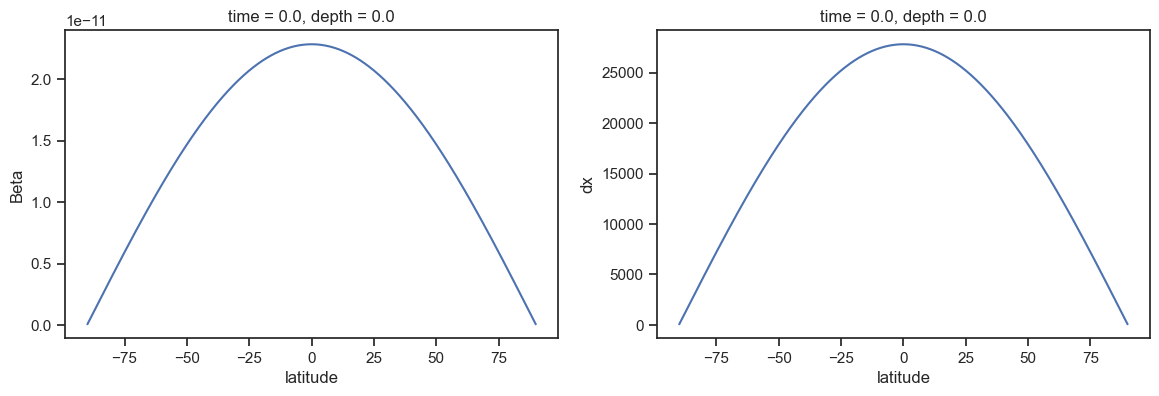

In [42]:
#ds_deg['beta_V']

# Compute beta and dx

OMEGA = 7.2921e-5
RAD_EARTH = 6.378e6

beta = 2*OMEGA*np.cos(ds_deg['latitude'] * np.pi /180.)/RAD_EARTH

d_lon = 0.25

dx = d_lon * np.cos(ds_deg['latitude'] * np.pi / 180.) * (2 * np.pi * RAD_EARTH / 360.)

fig = plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
beta.plot()
plt.ylabel('Beta')

plt.subplot(1,2,2)
dx.plot()
plt.ylabel('dx')

In [45]:
# Comupte psi

V = (ds_deg['beta_V'].isel(filter_scale = 4) /beta).where((mask1 == 0.) | (mask1 == 3.)) # let's choose field filtered to 2 deg in North Atlantic

psi = (V * dx).cumsum('longitude') 

psi = (psi - psi.isel(longitude=0)) / 1.e6

#psi

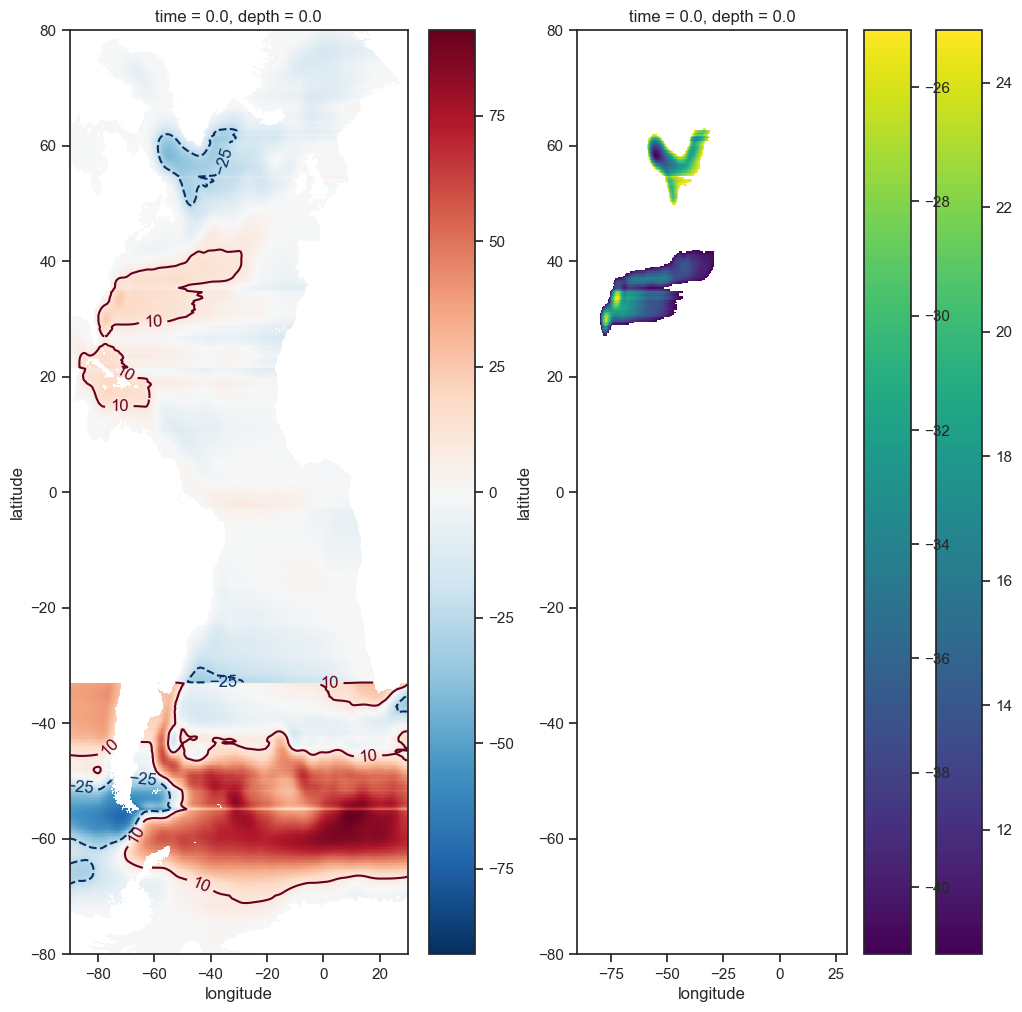

In [46]:
fig = plt.figure(figsize=[12,12])

plt.subplot(1,2,1)
psi.sel(longitude=slice(-90., 30.), latitude = slice(-80., 80.)).where((mask1 == 0.) | (mask1 == 3.)).plot()
contours = psi.sel(longitude=slice(-90., 30.), latitude = slice(-80., 80.)).where((mask1 == 0.)| (mask1 == 3.)).plot.contour(levels= [-25., 10.])

plt.clabel(contours, inline=True, fontsize=12)

plt.subplot(1,2,2)

psi.sel(longitude=slice(-90., 30.), latitude = slice(-80., 80.)
       ).where((mask1 == 0.) & (psi >= 10. ) & (psi.latitude > 27.)).plot()
psi.sel(longitude=slice(-90., 30.), latitude = slice(-80., 80.)
       ).where((mask1 == 0.) & (psi <= -25. ) & (psi.latitude > 27.)).plot()

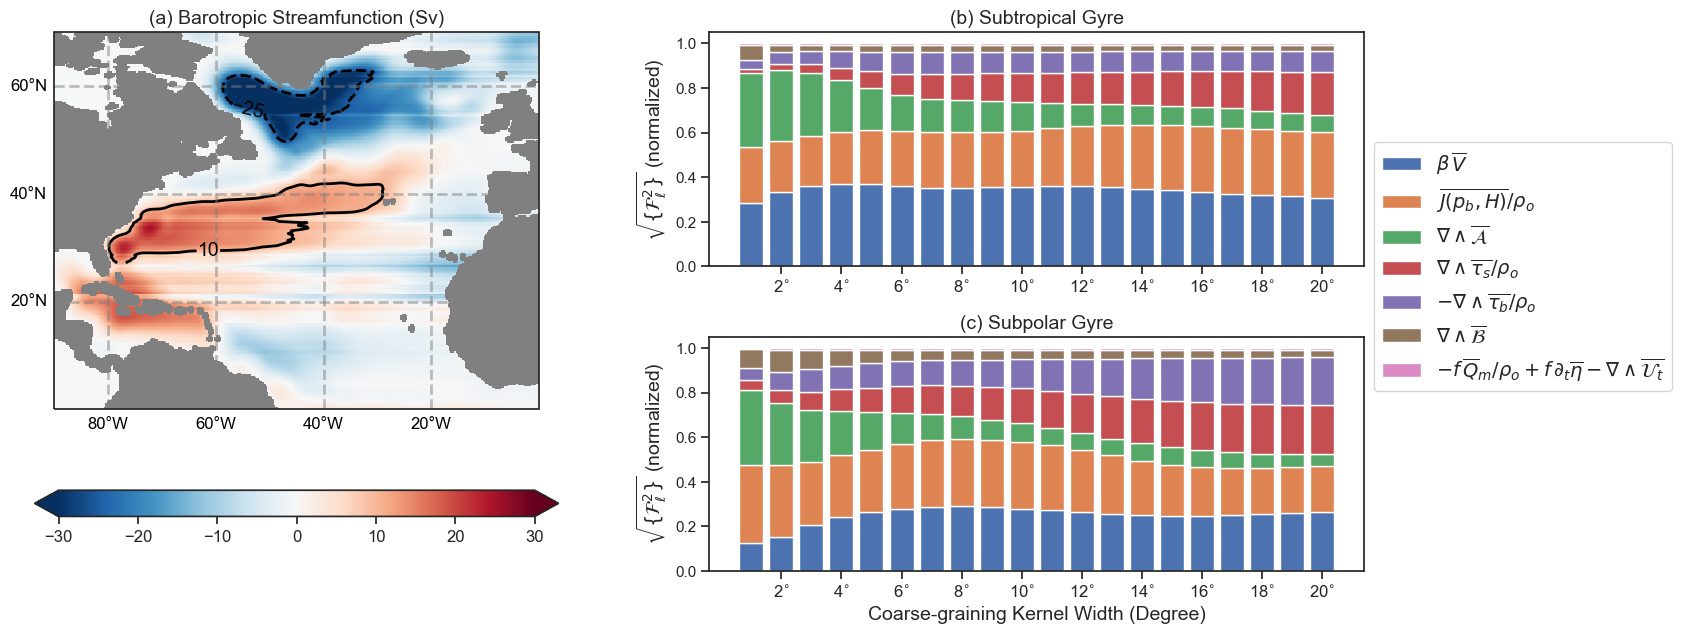

In [49]:
lat_lon_ext = [-90., 0., 0., 70.]

max_r = 30.
psi_lev = [10., -25.]

grid1 = plt.GridSpec(2, 4, wspace=0.3, hspace=0.3)
fig = plt.figure(figsize=[18,7])

ax = fig.add_subplot(grid1[0:2, 0:2],projection=ccrs.PlateCarree(),facecolor='grey')
p = plot_sec(ax, psi.where(mask_model == 1.), vmin=-max_r, vmax=max_r, vstep=2.e-3, 
             lat_lon_ext = lat_lon_ext, lon='longitude', lat='latitude', cmap='RdBu_r', 
             title=r'(a) Barotropic Streamfunction (Sv)')
cb = plt.colorbar(p, ax=ax, extend='both', shrink=0.8, orientation="horizontal")
cb.ax.tick_params(labelsize=12)
contours = ax.contour(psi.longitude, psi.latitude, 
                      psi.where((mask1 == 0) & (psi.latitude > 27.)), levels = [-25., 10.], 
                      colors='black',linewidths=2)
plt.clabel(contours, inline=True, fontsize=14)

# loop for computing domain-avg values and barplot

fldlist = ['beta_V', 'BPT','Curl_taus','Curl_taub','Curl_Adv','Curl_diff', 'Rest']
var_name = ['beta_V', 'BPT','Curl_Adv', 'Curl_taus', 'Curl_taub', 'Curl_diff', 'Rest']

label_title = ['(b) Subtropical Gyre', '(c) Subpolar Gyre']

for i in range(0,len(psi_lev)):

    if(i==0):
        ds = ds_deg.where((mask1 == 0.) & (psi >= psi_lev[i]) & (psi.latitude > 27.))
        area = ds_km['cell_areas'].isel(filter_scale=0).where((mask1 == 0.) & (psi >= psi_lev[i]) & (psi.latitude > 27.))
    else:
        ds = ds_deg.where((mask1 == 0.) & (psi <= psi_lev[i]) & (psi.latitude > 27.))
        area = ds_km['cell_areas'].isel(filter_scale=0).where((mask1 == 0.) & (psi <= psi_lev[i]) & (psi.latitude > 27.))
        
    ds_deg_std = xr.Dataset()

    for fld in fldlist:

        if (fld == 'Rest'):
            tmp1 = ds['Mass_flux'] + ds['eta_dt'] + ds['Curl_dudt']
            tmp = (tmp1 * tmp1 * area/area).sum(['latitude', 'longitude']) / (area/area).sum(['latitude', 'longitude'])
        else:
            tmp = (ds[fld] * ds[fld] * area/area).sum(['latitude', 'longitude']) / (area/area).sum(['latitude', 'longitude'])

        ds_deg_std[fld] = np.sqrt(tmp) # standard deviation
        
    
    # plot
    width = 0.8 
    d = ds_deg_std
    scale = np.arange(d.filter_scale.shape[0]) + 1.0
    
    ax = fig.add_subplot(grid1[i, 2:4])
    
    bot = 0.
    pos = - 0.0
    width = 0.8

    norm_fac = d['beta_V'] + d['BPT'] + d['Curl_Adv'] + d['Curl_taus'] + d['Curl_taub'] + d['Curl_diff'] + d['Rest']

    labels = [r'$\beta \, \overline{V}$', r'$\overline{J(p_b, H)}/\rho_o$', r'$\nabla \wedge \overline{\mathcal{A}}$',
              r'$\nabla \wedge\overline{{\tau_s}}/\rho_o$', r'$-\nabla \wedge\overline{{\tau_b}}/\rho_o$',
              r'$\nabla \wedge \overline{\mathcal{B}}$', #'Rest']
              r'$-f \, \overline{Q}_m/{\rho_o}+f \, \partial_t\overline{\eta}-\nabla \wedge \overline{\mathcal{U}_t}$']

    for var in var_name:

        tmp = d[var] / norm_fac

        plt.bar(scale + pos, tmp, width, bottom=bot)

        pos = pos + 0.*width

        bot = bot + tmp

    if(i>0):
        ax.set_xlabel("Coarse-graining Kernel Width (Degree)", fontsize=14)   
    ax.set_ylabel(r'$\sqrt{\{\mathcal{F}_\ell^2\}}$ (normalized)', fontsize=14)
    tick_Labels = [r'2$^{\circ}$', r'4$^{\circ}$', r'6$^{\circ}$', r'8$^{\circ}$', r'10$^{\circ}$',
             r'12$^{\circ}$', r'14$^{\circ}$', r'16$^{\circ}$', r'18$^{\circ}$', r'20$^{\circ}$']
    plt.xticks(np.arange(2,21,2), tick_Labels, fontsize=12);
    ax.set_title(label_title[i], fontsize=14)
    if (i==0):
        ax.legend(labels, loc='center left', bbox_to_anchor=(1.0, 0.0), fontsize=14)
        
#fig.savefig('../../Plots/Gyre_Budget.pdf',dpi=150,bbox_inches='tight');
fig.savefig('../../Plots/Gyre_Budget.png',dpi=300,bbox_inches='tight');

#### Latitudinal dependence

We plot the zonal-mean root-mean-square, $\sqrt{\mathcal{F}^2_\ell}$, magnitudes of vorticity budget terms.


In [50]:
fldlist = ['beta_V', 'BPT','Curl_taus','Curl_taub','Curl_Adv','Curl_diff', 'Rest']

ds = ds_deg
ds_deg_std = xr.Dataset()
for fld in fldlist:

    if (fld == 'Rest'):
        tmp1 = ds['Mass_flux'] + ds['eta_dt'] + ds['Curl_dudt']
        tmp = (tmp1 * tmp1).mean(['longitude'], skipna=True) 
    else:
        tmp = (ds[fld] * ds[fld]).mean(['longitude'], skipna=True) 

    ds_deg_std[fld] = np.sqrt(tmp) # standard deviation


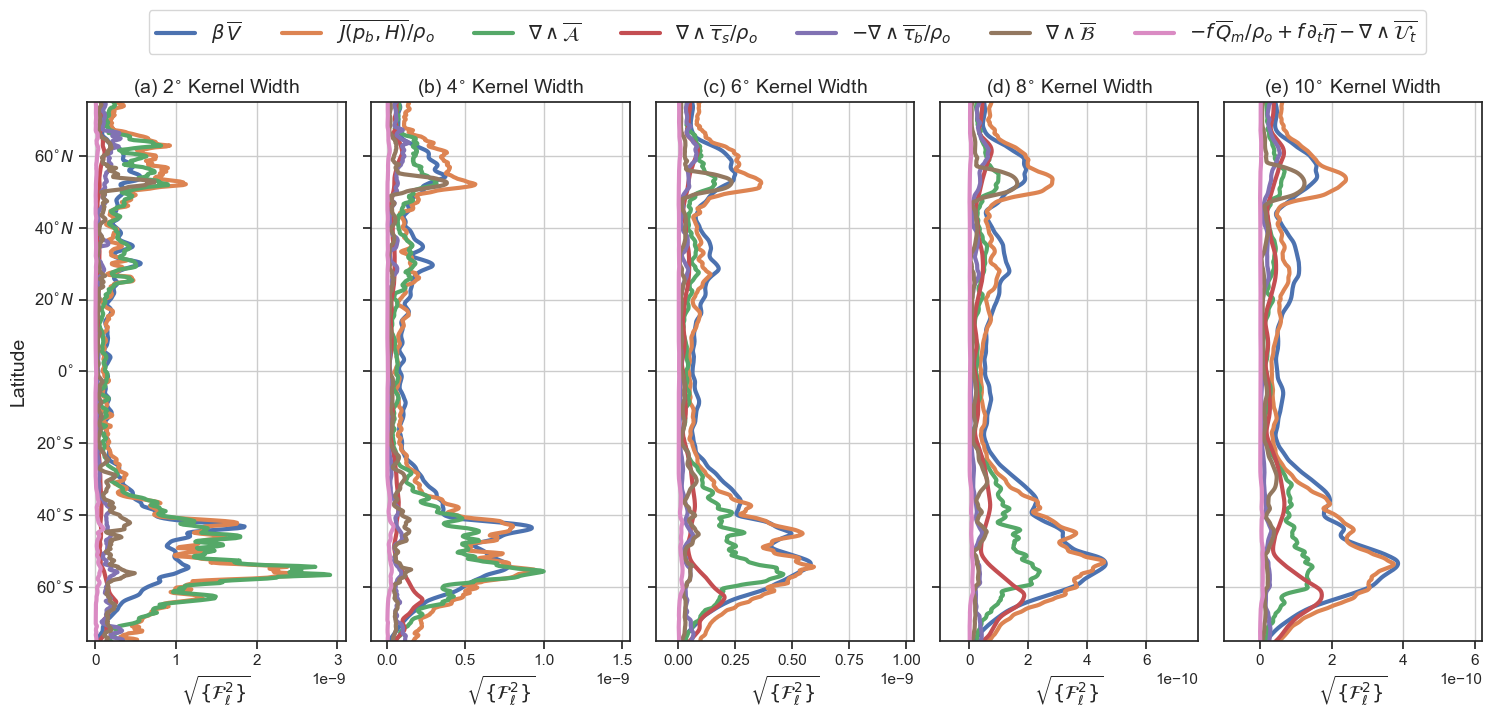

In [52]:
var_name = ['beta_V', 'BPT','Curl_Adv', 'Curl_taus', 'Curl_taub', 'Curl_diff' , 'Rest']

labels = [r'$\beta \, \overline{V}$', r'$\overline{J(p_b, H)}/\rho_o$', r'$\nabla \wedge \overline{\mathcal{A}}$',
          r'$\nabla \wedge\overline{{\tau_s}}/\rho_o$', r'$-\nabla \wedge\overline{{\tau_b}}/\rho_o$',
          r'$\nabla \wedge \overline{\mathcal{B}}$' ,
         r'$-f \, \overline{Q}_m/{\rho_o}+f \, \partial_t\overline{\eta}-\nabla \wedge \overline{\mathcal{U}_t}$']

tick_Labels = [r'60$^{\circ}S$', r'40$^{\circ}S$', r'20$^{\circ}S$', r'0$^{\circ}$', r'20$^{\circ}N$', 
               r'40$^{\circ}N$', r'60$^{\circ}N$']

label_title = [r'(a) 2$^{\circ}$ Kernel Width', r'(b) 4$^{\circ}$ Kernel Width', r'(c) 6$^{\circ}$ Kernel Width',
              r'(d) 8$^{\circ}$ Kernel Width', r'(e) 10$^{\circ}$ Kernel Width']

grid1 = plt.GridSpec(1, 5, wspace=0.1, hspace=0.2)
fig = plt.figure(figsize=[18,7])

k = 0
for i in range(2,11,2):
    
    ax = fig.add_subplot(grid1[0,k])
    k= k + 1
    
    for var in var_name:
    
        ax.plot(ds_deg_std[var].isel(filter_scale=i-1), ds_deg_std.latitude, lw=3.)
        ax.grid('on')
        
        if(k==1):
            ax.set_ylabel("Latitude", fontsize=14)   
        ax.set_xlabel(r'$\sqrt{\{\mathcal{F}_\ell^2\}}$', fontsize=14)
        
        if (k==1):
            ax.legend(labels, loc='center left', ncol=7,  bbox_to_anchor=(0.2, 1.13), fontsize=14)
            
    ax.set_ylim(-75, 75)
    ax.set_xlim(-1.e-10, 3.1e-9/k)
    if (k==1):
        plt.yticks(np.arange(-60,61,20), tick_Labels, fontsize=12);
    else:
        plt.yticks(np.arange(-60,61,20), [], fontsize=12);
        
    ax.set_title(label_title[k-1], fontsize=14)
    
fig.savefig('../../Plots/Lat_Kernel.pdf',dpi=300,bbox_inches='tight');